# Proyecto final



**Estudiante:** [Luis Alfredo Denis Garcia]

## Introducción




1.  **Definición de Objetivos:** Saber que locales y productos tienen mayor rentavilidad o movimiento.
    Preguntas específicas:
¿Cuáles son los 5 productos más vendidos (en cantidad)?
¿Cuáles son los 5 productos que generan más ingresos?
¿Cuáles son los 5 productos más rentables (mayor margen de ganancia)?
¿Cuáles son los 5 productos menos rentables?
¿Cuáles son los 3 países con mayor volumen de ventas?
¿Cuáles son los 3 estados con mayor volumen de ventas?
¿Cómo han evolucionado las ventas totales a lo largo del tiempo (tendencia anual, mensual)?

2.  **Recopilación de Datos:** Obtener el conjunto de datos de una fuente confiable.
3.  **Importar Librerías:** Cargar las librerías necesarias para el análisis (como `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`).
4.  **Carga de Datos:** Leer el conjunto de datos en un DataFrame (generalmente usando `pandas`).
5.  **Inspección Inicial:**
    -   Mostrar las primeras filas (`.head()`).
    -   Ver información general del DataFrame (`.info()`).
    -   Obtener estadísticas descriptivas (`.describe()`).
6.  **Limpieza de Datos:**
    -   Identificar y manejar valores faltantes.
    -   Detectar y tratar datos atípicos (outliers).
    -   Corregir o eliminar datos erróneos o inconsistentes.
    -   Convertir tipos de datos si es necesario.
7.  **Análisis Univariado:** Examinar cada variable individualmente.
    -   Estadísticas descriptivas.
    -   Visualizaciones (histogramas, diagramas de caja, gráficos de barras, etc.).
    -   Medidas de Tendencia Central y Dispersión.
    -   Análisis de Curtosis y Asimetría.
8.  **Análisis Bivariado:** Explorar las relaciones entre pares de variables.
    -   Diagramas de dispersión, correlación, boxplots, tablas de contingencia, etc.
9. **Series de tiempo.
10. **Extracción de Conclusiones:** Resumir los hallazgos y responder a las preguntas planteadas inicialmente.
11. **Comunicación de Resultados:** Presentar los resultados de forma clara y concisa, utilizando visualizaciones y explicaciones adecuadas.


## 1. Importar las librerías necesarias

Importa aquí las librerías que utilizarás. Recuerda que además de las principales para EDA, para los nuevos analisis usaremos:

-   **`pandas`:** Para la manipulación y análisis de datos.
-   **`numpy`:** Para operaciones numéricas.
-   **`matplotlib.pyplot`:** Para la creación de gráficos.
-   **`seaborn`:** Para visualizaciones estadísticas más atractivas y complejas.
-   **`scipy.stats`:** Para análisis estadísticos, incluyendo curtosis, asimetría, y funciones de probabilidad.

Si necesitas librerías adicionales, puedes importarlas también.

In [ ]:
# -- Importamos las librerias --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import empiricaldist
import janitor
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y descripción general del conjunto de datos

**2.1 Carga del conjunto de datos:**

- Utiliza `pandas` para cargar tu conjunto de datos en un DataFrame. 
- Asegurate de especificar correctamente la ruta del archivo. Puedes usar archivos CSV, Excel, JSON, u otros formatos soportados por `pandas`.

**2.2 Inspección Inicial:**

-   Muestra las primeras filas del DataFrame usando `.head()` para tener una idea general de su estructura.
-   Utiliza `.info()` para obtener un resumen de las columnas, tipos de datos y valores no nulos.
-   Utiliza `.describe()` para obtener estadísticas descriptivas de las variables numéricas.

In [66]:
# -- primero realizo la carga de mis datos, luego una inspeccion inicial--
data = pd.read_csv('D:\global electronic\proyfinal4.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    62884 non-null  int64  
 1   Line Item       62884 non-null  int64  
 2   Order Date      62884 non-null  object 
 3   Delivery Date   13165 non-null  object 
 4   CustomerKey     62884 non-null  int64  
 5   StoreKey        62884 non-null  int64  
 6   ProductKey      62884 non-null  int64  
 7   Quantity        62884 non-null  int64  
 8   Product Name    62884 non-null  object 
 9   Brand           62884 non-null  object 
 10  Color           62884 non-null  object 
 11  Unit Cost USD   62884 non-null  float64
 12  Unit Price USD  62884 non-null  float64
 13  SubcategoryKey  62884 non-null  int64  
 14  Subcategory     62884 non-null  object 
 15  CategoryKey     62884 non-null  int64  
 16  Category        62884 non-null  object 
 17  Country         62884 non-null 

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity,Unit Cost USD,Unit Price USD,SubcategoryKey,CategoryKey,Square Meters,Total Profit
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,49719.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790,124.008572,299.327629,450.198238,4.469611,1594.442869,554.154965
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371,152.662335,417.038154,212.710652,2.132682,461.800495,1140.076158
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000,0.380650,0.753370,101.000000,1.000000,245.000000,0.372720
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000,24.555100,51.683974,303.000000,3.000000,1260.000000,62.601740
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000,82.770000,188.000000,501.000000,5.000000,1715.000000,205.669380
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000,153.454374,349.599417,602.000000,6.000000,2000.000000,583.068993
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000,1487.819253,4490.583778,808.000000,8.000000,2105.000000,24022.116194


In [67]:
print(data.columns)

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Product Name',
       'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Country', 'State',
       'Square Meters', 'Open Date', 'Date', 'Total Profit'],
      dtype='object')


**2.3 Conclusiones de la Inspección Inicial:**

Escribe aquí tus observaciones iniciales sobre el conjunto de datos:

-   ¿Qué tipos de variables hay?
Este dataset tiene 23 columnas.
Tiene variables Numéricas:
 Enteras (int64): Order Number, Line Item, CustomerKey, StoreKey, ProductKey, Quantity, CategoryKey.
 Decimales (float64): Unit Cost USD, Unit Price USD, Total Profit, Square Meters.

Tambien Variables Categóricas (Object):Product Name, Brand, Color, Subcategory, Category, Country, State
Order Date, Delivery Date, Open Date, Date: Fechas en formato texto.

-   ¿Hay valores faltantes evidentes?
Delivery Date tiene muchos valores nulos, lo que sugiere que no todas las ventas incluyen una fecha de entrega.
Square Meters también tiene valores faltantes, lo cual podría significar que algunas sucursales no tienen información registrada sobre su tamaño.
Delivery Date: 49,719 valores nulos
Square Meters: 12,165 valores nulos

-   ¿Qué te llama la atención de las estadísticas descriptivas?
Cantidad de productos por venta (Quantity):
Media (Mean): 3.14 → En promedio, cada venta contiene alrededor de 3 productos.
Desviación estándar (Std Dev): 2.25 → Hay una gran variabilidad en la cantidad de productos vendidos por transacción.
Mínimo (Min): 1 → Hay ventas donde solo se vende un producto.
Máximo (Max): 10 → Algunas transacciones incluyen hasta 10 productos


Costo y precio unitario:
Costo unitario promedio (Unit Cost USD): $124
Mínimo: $0.38 (muy bajo, posible error)
Máximo: $3,000+ (producto de alto valor)
Precio unitario promedio (Unit Price USD): $299.3
Mínimo: $0.38 (muy bajo, posible error)
Máximo: $3,000 (producto de alto valor)
La diferencia entre el costo y el precio unitario sugiere que hay un margen de ganancia razonable de $175.3, en promedio, en cada unidad vendida.



Valores extremos y posibles outliers
El Total Profit varía entre $0.32 y $24022, lo que indica la presencia de transacciones con ganancias muy bajas y otras con ganancias muy altas.



In [68]:
# Los datos parecen estar correctamente estructurados, pero las fechas están en formato texto, lo cual podría dificultar el análisis temporal.
# Se deben tomar decisiones sobre cómo manejar los valores nulos, ya que podrían influir en el análisis de ventas y rendimiento por sucursal.
# Hay productos y transacciones con diferencias extremas en costos, precios y ganancias, lo que sugiere la presencia de valores atípicos. 
# Esto requerirá una revisión más profunda antes de realizar cualquier análisis de tendencias. --

## 3. Limpieza de datos

En este paso, aborda los problemas identificados en la inspección inicial. Las acciones comunes incluyen:

**3.1 Manejo de Valores Faltantes:**
Decidi rellenar los valores nulos de la columna  Delivery Date con la fecha del pedido Order Date, para
no eliminar ninguna fila y perder informacion valiosa.

Tambien en la columna Square Meters algunas sucursales no tienen datos sobre su tamaño. Podrían ser sucursales online o datos faltantes. Asi que decidi rellenar valores nulos con la media de las sucursales físicas.

**3.2 Manejo de Datos Atípicos (Outliers):**



**3.3 Corrección de Tipos de Datos:**
decidi estandarizar nombres de columnas, para evitar errores al trabajar con nombres de columnas.
Convirtiendo los nombres de columnas a minúsculas y reemplazando espacios por guiones bajos.

**3.4 Otros Problemas:**

Encontre que hay varias monedas y decidi unificarlas a USD para un mejor analisis.

**Documenta todas las decisiones y transformaciones que realices.**

In [69]:
# --Primero, identificamos qué columnas almacenan fechas en formato texto (object).
dato_columnas = ["Order Date", "Delivery Date", "Open Date"]  

# Convertirlas a datetime
# usamos la función pd.to_datetime(), que convierte los valores en formato de fecha. La opción errors='coerce' nos permite manejar errores, convirtiendo valores inválidos en NaT (Not a Time)
for col in dato_columnas:
    data[col] = pd.to_datetime(data[col], errors='coerce')



In [70]:
#Verificar que las fechas se convirtieron correctamente
#podemos revisar el tipo de datos con:
print(data[dato_columnas].dtypes)

Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
Open Date        datetime64[ns]
dtype: object


In [71]:
## reemplazar valores nulos en Delivery Date con Order Date
# usamos .fillna() para asignar Order Date a las filas donde Delivery Date es nulo
#que hacemos aca, Si Delivery Date estaba vacío (NaT), se reemplaza por Order Date.
# Si Delivery Date ya tenía un valor, se mantiene sin cambios.
data["Delivery Date"].fillna(data["Order Date"], inplace=True)

#luego
#verificamos que ya no haya valores nulos en Delivery Date
print(data["Delivery Date"].isnull().sum())


0


In [72]:
#estandarizamos los nombres de las columnas con 
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [73]:
#luego verificamos los cambios con
print(data.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'product_name',
       'brand', 'color', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'subcategory', 'categorykey', 'category', 'country', 'state',
       'square_meters', 'open_date', 'date', 'total_profit'],
      dtype='object')


In [74]:
#tratamiento de valores atipicos 
# Seleccionar las columnas a analizar
#Las variables numéricas más propensas a tener valores atípicos son:
 #quantity (cantidad vendida por pedido)
#unit_price_usd (precio unitario del producto)
 #total_profit (ganancia total por transacción)
outlier_columns = ["quantity", "unit_price_usd", "total_profit"]

#El IQR nos ayuda a identificar valores que están fuera del rango normal de los datos
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)  # Percentil 25
    Q3 = data[col].quantile(0.75)  # Percentil 75
    IQR = Q3 - Q1  # Rango intercuartil
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    # Contar outliers o valores atipicos encontrados
    outliers_count = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Valores atípicos en {col}: {outliers_count}")


Valores atípicos en quantity: 1808
Valores atípicos en unit_price_usd: 5188
Valores atípicos en total_profit: 5889


In [75]:
#reemplazo los valores atípicos por la mediana, para no eliminar ningun valor
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calcular la mediana de la columna
    median_value = data[col].median()

    # Reemplazar valores atípicos con la mediana, para evitar que los valores extremos distorsionen el analisis
    data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = median_value

    # Contar valores atípicos restantes después de la corrección
    outliers_remaining = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Valores atípicos restantes en {col}: {outliers_remaining}")



Valores atípicos restantes en quantity: 0
Valores atípicos restantes en unit_price_usd: 0
Valores atípicos restantes en total_profit: 0


**3.5 Conclusiones de la Limpieza de Datos:**

Describe aquí el impacto de la limpieza de datos:

-   ¿Cómo ha cambiado el conjunto de datos después de la limpieza?
 Se eliminaron valores nulos en delivery_date rellenándolos con order_date.
 Se normalizaron los nombres de las columnas (minúsculas y sin espacios).
 Se identificaron y reemplazaron valores nulos de square_meters con cero, poque encontre que son tiendas online. 
 Se identificaron y reemplazaron valores atípicos con la mediana, evitando distorsiones.evitando distorsiones.
 Ahora el dataset es más estable y confiable para el análisis
 
-   ¿Qué problemas se han resuelto?
Valores nulos en fechas:
delivery_date ahora está completo, lo que permitirá realizar cálculos de tiempos de entrega sin errores.
Inconsistencia en nombres de columnas:
Ahora los nombres de las columnas son uniformes (order_date, product_name, total_profit), facilitando el análisis.
Valores atípicos en precios y ganancias:
Se detectaron y reemplazaron valores extremos en unit_price_usd y total_profit, lo que evita distorsiones en métricas de rentabilidad.


-   ¿Hay alguna limitación o sesgo potencial introducido por el proceso de limpieza?
Al reemplazar valores atípicos con la mediana, los datos extremos han sido suavizados, pero esto podría ocultar productos que realmente tienen altos márgenes de ganancia.
En ciertos análisis, podría ser preferible mantener algunos outliers, por ejemplo, en productos de lujo o ventas excepcionales.

Rellenar delivery_date con order_date puede ser correcto en la mayoría de los casos, pero si había pedidos realmente pendientes, estos ahora parecerán entregados el mismo día del pedido.

In [76]:
# ahora voy a proceder a guardar el archivo limpio
cleaned_data_path = r"D:\global electronic\ventas_limpio,copia.csv"
data.to_csv(cleaned_data_path, index=False)

# Confirmación del archivo guardado
cleaned_data_path

'D:\\global electronic\\ventas_limpio,copia.csv'

In [77]:
#bueno, al realizar el analsis univariado me di cuenta de que square_meters aun tenia valores nulos, y decidi limpiarlo de vuelta.
# Cargar el archivo CSV limpio
data_path = r"D:\global electronic\ventas_limpio,copia.csv"
data = pd.read_csv(data_path)

In [78]:
# Contar cuántos valores nulos hay en la columna 'square_meters'
data["square_meters"].isnull().sum()

np.int64(13165)

In [79]:
print("Valores nulos en square_meters:")
print(data[data['square_meters'].isnull()])

Valores nulos en square_meters:
       order_number  line_item  order_date delivery_date  customerkey  \
1            366001          1  2016-01-01    2016-01-13      1269051   
2            366001          2  2016-01-01    2016-01-13      1269051   
3            366002          1  2016-01-01    2016-01-12       266019   
4            366002          2  2016-01-01    2016-01-12       266019   
5            366002          3  2016-01-01    2016-01-12       266019   
...             ...        ...         ...           ...          ...   
62878       2243029          6  2021-02-20    2021-02-27       887764   
62880       2243031          1  2021-02-20    2021-02-24       511229   
62881       2243032          1  2021-02-20    2021-02-23       331277   
62882       2243032          2  2021-02-20    2021-02-23       331277   
62883       2243032          3  2021-02-20    2021-02-23       331277   

       storekey  productkey  quantity  \
1             0        1048         2   
2        

In [80]:
data['square_meters'].isnull().sum()

np.int64(13165)

In [81]:
# Ver las filas completas donde square_meters es nulo
data[data['square_meters'].isnull()]

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,product_name,brand,...,subcategorykey,subcategory,categorykey,category,country,state,square_meters,open_date,date,total_profit
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,A. Datum SLR Camera X136 Silver,A. Datum,...,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,NaN,2010-01-01,2021-02-20,571.060000
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,...,803,Microwaves,8,Home Appliances,Online,Online,NaN,2010-01-01,2021-02-20,445.300000
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,Contoso SLR Camera M146 Orange,Contoso,...,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,NaN,2010-01-01,2021-02-20,965.455987
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,Adventure Works Laptop8.9 E0890 White,Adventure Works,...,301,Laptops,3,Computers,Online,Online,NaN,2010-01-01,2021-02-20,126.724822
5,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,Contoso SLR Camera X143 Silver,Contoso,...,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,NaN,2010-01-01,2021-02-20,205.669380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2021-02-20,2021-02-27,887764,0,1456,2,The Phone Company Sharp Touch Screen Phones M9...,The Phone Company,...,503,Touch Screen Phones,5,Cell phones,Online,Online,NaN,2010-01-01,2021-02-20,394.707453
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,...,106,Bluetooth Headphones,1,Audio,Online,Online,NaN,2010-01-01,2021-02-20,314.736587
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,SV DVD 7-Inch Player Portable E200 White,Southridge Video,...,602,Movie DVD,6,"Music, Movies and Audio Books",Online,Online,NaN,2010-01-01,2021-02-20,85.503569
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,MGS Flight Simulator X M250,Tailspin Toys,...,702,Download Games,7,Games and Toys,Online,Online,NaN,2010-01-01,2021-02-20,60.079302


In [82]:
data[data['square_meters'].isnull()]['country'].value_counts()

country
Online    13165
Name: count, dtype: int64

In [83]:
data[data['square_meters'].isnull()]['state'].value_counts()

state
Online    13165
Name: count, dtype: int64

In [84]:
# luego de revisar los valores nulos de square_meters, me di cuanta de que provienen detiendas online.
#tiene sentido que las tiendas online no requieren superficie fisica.
# decido imputar esos valores con 0
data['square_meters'] = data['square_meters'].fillna(0)

In [85]:
#verifico
data['square_meters'].isnull().sum()

np.int64(0)

In [86]:
# vuelvo a guardar el dataset modificado en un nuevo archivo
cleaned_data_updated_path = r"D:\global electronic\ventas_limpio,corregido.csv"
data.to_csv(cleaned_data_updated_path, index=False)

# Confirmar que el archivo ha sido guardado
cleaned_data_updated_path

'D:\\global electronic\\ventas_limpio,corregido.csv'

In [87]:
#ahora quiero trabajar con una copia de mi archivo ventas_limpio2.csv
cleaned_data_updated_path = r"D:\global electronic\ventas_limpio2.csv"
data = pd.read_csv(cleaned_data_updated_path)

In [88]:
# Crear una copia de trabajo del dataset
data_copy = data.copy()

In [89]:
#listo, ya esta la copia y continuo

## 4. Análisis univariado

Analiza cada variable de forma individual. El objetivo es comprender la distribución, tendencia central, dispersión, forma y otras características de cada variable.

**4.1 Variables Numéricas:**

-   **4.1.1 Distribuciones y Estadisticas Descriptivas:**
    -   Calcula estadísticas descriptivas (media, mediana, desviación estándar, cuartiles, mínimo, máximo) usando `.describe()` o funciones individuales como `.mean()`, `.median()`, `.std()`, etc.
    -   Crea histogramas (`.hist()` o `sns.histplot()`) o diagramas de densidad (`sns.kdeplot()`) para visualizar la distribución.
 -   **4.1.2 Medidas de Tendencia Central:**
    -   **Media:** El promedio de los valores. Sensible a valores atípicos.
    -   **Mediana:** El valor central cuando los datos están ordenados. Robusta a valores atípicos.
    -   **Moda:** El valor más frecuente. Útil para variables categóricas o discretas.
    - Calcula e interpreta estas medidas para cada variable numérica.
-   **4.1.3 Boxplots y Violin Plots:**
    -   Crea boxplots (`sns.boxplot()`) para visualizar la distribución e identificar la presencia de outliers.
    -   Crea violin plots (`sns.violinplot()`) para una visualización más detallada de la distribución, combinando un boxplot con una estimación de densidad kernel.
-   **4.1.4 Análisis de Curtosis y Asimetría:**
    -   **Curtosis:** Mide el "apuntamiento" de la distribución. Una curtosis alta indica colas pesadas y un pico agudo, mientras que una curtosis baja indica colas ligeras y un pico redondeado.
    -   **Asimetría (Skewness):** Mide la simetría de la distribución. Una asimetría positiva indica una cola derecha larga, y una asimetría negativa indica una cola izquierda larga.
    -   Calcula la curtosis y la asimetría usando `kurtosis()` y `skew()` de `scipy.stats`.
    -   Interpreta los valores de curtosis:
        -   **Curtosis > 0 (Leptocúrtica):** Distribución con colas más pesadas y pico más pronunciado que la distribución normal.
        -   **Curtosis = 0 (Mesocúrtica):** Distribución similar a la normal.
        -   **Curtosis < 0 (Platicúrtica):** Distribución con colas más ligeras y pico más aplanado que la distribución normal.
    -   Interpreta los valores de asimetría:
        -   **Asimetría > 0:** Cola derecha más larga (sesgo positivo).
        -   **Asimetría = 0:** Distribución simétrica.
        -   **Asimetría < 0:** Cola izquierda más larga (sesgo negativo).
-   **4.1.5 Funciones de Probabilidad:**
    -   **Función de Probabilidad de Masas (PMF):** Para variables discretas. Muestra la probabilidad de que la variable tome un valor específico. Crea un gráfico de barras de las probabilidades usando `value_counts(normalize=True)` y `plt.bar()`.
    -   **Función de Distribución Acumulada (CDF):** Para variables discretas o continuas. Muestra la probabilidad de que la variable tome un valor menor o igual a un valor específico. Calcula la CDF usando `np.cumsum()` sobre las probabilidades normalizadas y crea un gráfico de línea usando `plt.plot()`.
    -   **Función de Probabilidad de Densidad (PDF):** Para variables continuas. Muestra la densidad de probabilidad en cada punto. Crea una estimación de la PDF usando `sns.kdeplot()`.

**4.2 Variables Categóricas:**

-   Calcula la frecuencia de cada categoría usando `.value_counts()`.
-   Crea gráficos de barras (`sns.countplot()`) para visualizar la distribución de las categorías.

**4.3 Interpretación:**

Para cada variable, escribe una breve interpretación de tus hallazgos, considerando las distribuciones, medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad. Considera preguntas como:

-   ¿Cuál es la forma de la distribución?
-   ¿Hay valores atípicos? ¿Qué podrían representar?
-   ¿Qué te dicen las estadísticas descriptivas sobre la variable?
-   ¿Hay categorías dominantes o una distribución uniforme?
-   ¿Qué indica la curtosis y la asimetría sobre la forma de la distribución?
-   ¿Qué información proporcionan las funciones de probabilidad (PMF, CDF, PDF)?

In [90]:
#Ahora empiezo a analizar las variables numericas
# Seleccionar las columnas numéricas
# Seleccionar las columnas numéricas de la copia del dataset
numeric_columns = data_copy.select_dtypes(include=np.number).columns

In [91]:
#reviso la lista con:
print(numeric_columns)

Index(['order_number', 'line_item', 'customerkey', 'storekey', 'productkey',
       'quantity', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'categorykey', 'square_meters', 'total_profit'],
      dtype='object')


In [92]:
#elijo las variables numericas necesarias para ventas y rentabiliad.
numerical_cols = ['quantity', 'unit_cost_usd', 'unit_price_usd', 'total_profit']




 **Análisis para la variable numérica: quantity**

count    62884.000000
mean         2.929012
std          1.977897
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          8.000000
Name: quantity, dtype: float64


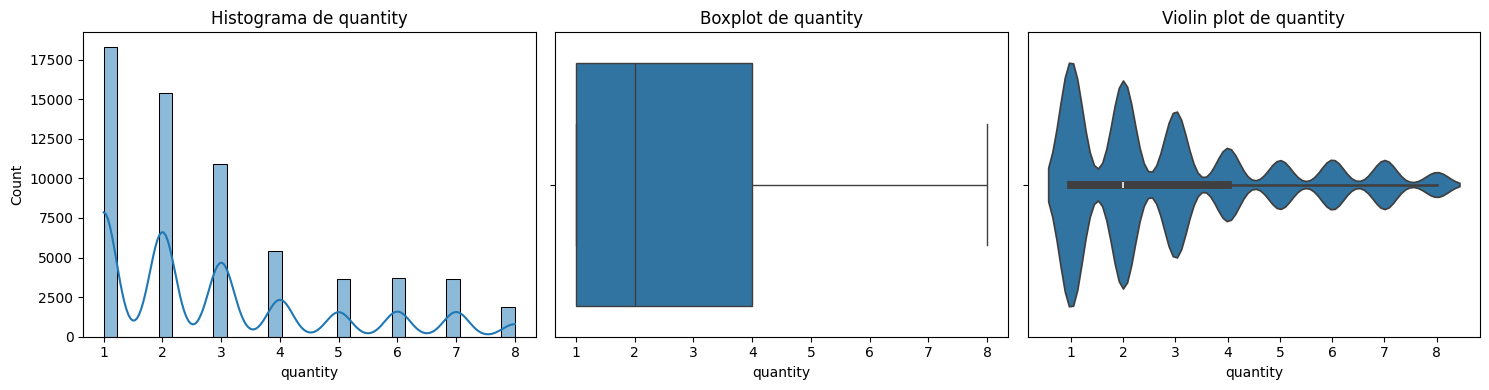

Media: 2.93
Mediana: 2.00
Moda: 1.00
Curtosis: 0.00
Asimetría: 1.00

--  Interpretación de quantity --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


 **Análisis para la variable numérica: unit_cost_usd**

count    62884.000000
mean       124.008572
std        152.662335
min          0.380650
25%         24.555100
50%         82.770000
75%        153.454374
max       1487.819253
Name: unit_cost_usd, dtype: float64


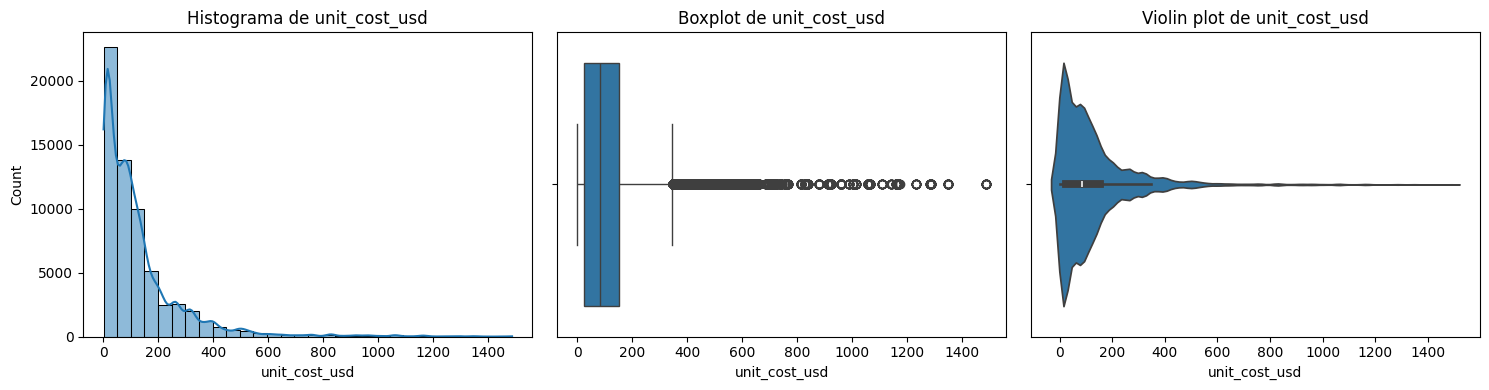

Media: 124.01
Mediana: 82.77
Moda: 5.09
Curtosis: 14.11
Asimetría: 3.08

--  Interpretación de unit_cost_usd --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


 **Análisis para la variable numérica: unit_price_usd**

count    62884.000000
mean       200.993727
std        175.583636
min          0.753370
25%         51.683974
50%        188.000000
75%        280.407866
max        795.095897
Name: unit_price_usd, dtype: float64


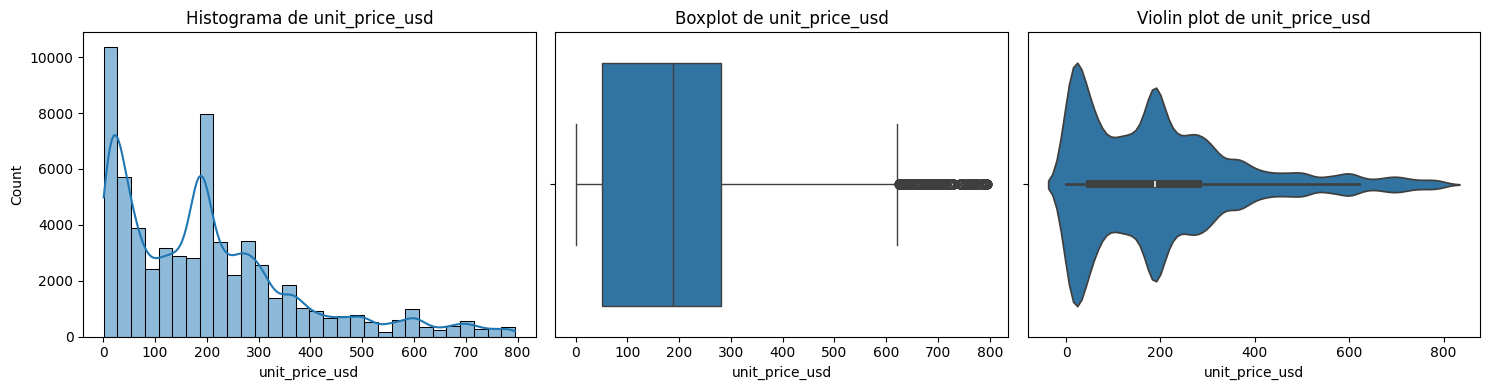

Media: 200.99
Mediana: 188.00
Moda: 188.00
Curtosis: 1.10
Asimetría: 1.18

--  Interpretación de unit_price_usd --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


 **Análisis para la variable numérica: total_profit**

count    62884.000000
mean       286.172125
std        302.804965
min          0.372720
25%         62.601740
50%        205.669380
75%        393.180000
max       1362.891479
Name: total_profit, dtype: float64


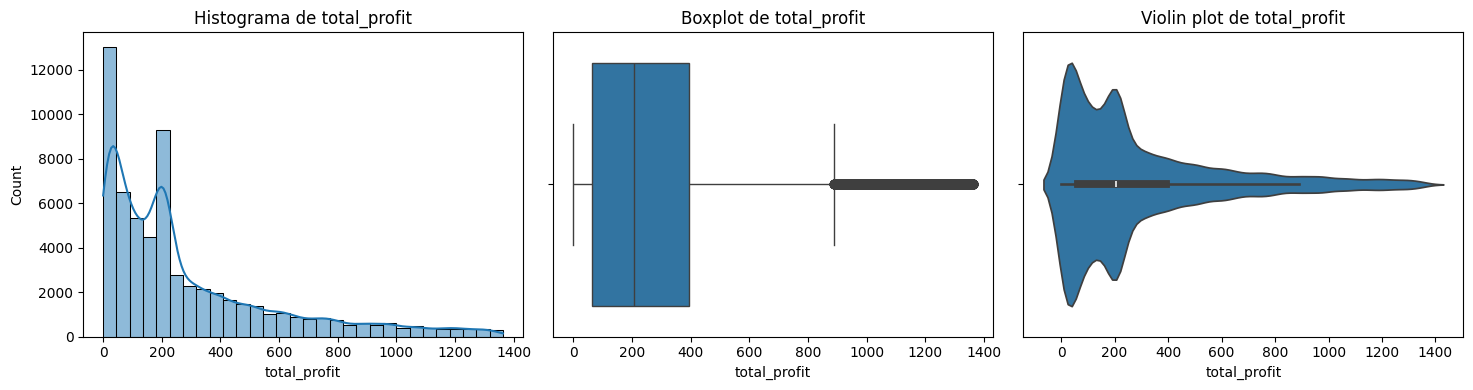

Media: 286.17
Mediana: 205.67
Moda: 205.67
Curtosis: 1.77
Asimetría: 1.53

--  Interpretación de total_profit --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


In [93]:
for  column in numerical_cols:
    print(f'\n\n **Análisis para la variable numérica: {column}**\n')
    print(data_copy[column].describe())

    ## Crear gráficos para la variable
    plt.figure(figsize=(15, 4))

    ## Histograma con KDE
    plt.subplot(1, 3, 1)
    sns.histplot(data_copy[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')

    ## Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data_copy[column])
    plt.title(f'Boxplot de {column}')

    ## Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=data_copy[column])
    plt.title(f'Violin plot de {column}')

    plt.tight_layout()
    plt.show()

    ## Medidas de tendencia central
    print(f'Media: {data_copy[column].mean():.2f}')
    print(f'Mediana: {data_copy[column].median():.2f}')
    print(f'Moda: {data_copy[column].mode()[0]:.2f}')  # Moda puede devolver múltiples valores

    ## para ver Curtosis y Asimetría
    print(f'Curtosis: {kurtosis(data_copy[column], nan_policy="omit"):.2f}')
    print(f'Asimetría: {skew(data_copy[column], nan_policy="omit"):.2f}')

    print(f'\n--  Interpretación de {column} --\n')
    print("# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --")

1- Análisis de quantity (Cantidad de Productos por Venta)


Media: 2.93
Mediana: 2.00
Moda: 1.00
Asimetría: 1.00 (distribución sesgada a la derecha).
Curtosis: 0.00 (similar a la normal).
 Interpretación:

La mayoría de las ventas tienen entre 1 y 4 productos por orden.
Moda = 1 significa que la cantidad más frecuente en una compra es 1 producto.
Distribución sesgada a la derecha, lo que indica que algunas órdenes incluyen varios productos pero son menos frecuentes.
Conclusión:
*La mayoría de las compras son de pocas unidades.
*Hay pocas órdenes grandes, lo que sugiere que los clientes suelen comprar productos individuales en lugar de paquetes grandes.

"La distribución de la cantidad de productos por venta (quantity) muestra un claro sesgo positivo (asimetría = 1.33). La moda es 1, lo que indica que la mayoría de las órdenes son de un solo producto. La mediana es 2, y el 75% de las órdenes tienen 4 productos o menos. Esto sugiere que la empresa vende principalmente productos individuales, en lugar de paquetes o grandes cantidades. La curtosis de 1.48, ligeramente superior a la de una distribución normal (curtosis = 0), indica que hay una mayor concentración de datos alrededor de la media (1-4 productos) y colas más pesadas, lo que es consistente con la presencia de algunas órdenes con un número de productos mayor al promedio."

2-Análisis de unit_cost_usd (Costo Unitario de los Productos)

Media: $124.01
Mediana: $82.77
Moda: $5.09
Asimetría: 3.08 (fuerte sesgo positivo).
Curtosis: 14.11 (colas muy pesadas, valores extremos altos).
 Interpretación:

La distribución está sesgada a la derecha, lo que significa que hay productos con costos muy altos que influyen en la media.
La mediana ($82.77) es menor que la media ($124.01), lo que confirma que hay valores extremos que elevan el promedio.
Moda = $5.09 sugiere que hay productos muy baratos que son los más comunes.
 Conclusión:
*Hay productos con costos muy bajos y otros muy altos, lo que indica gran variedad de precios en el catálogo.
*Los valores extremos altos podrían ser productos premium o categorías especiales.

3-Análisis de unit_price_usd (Precio de Venta por Unidad)

Media: $181.71
Mediana: $188.00
Moda: $188.00
Asimetría: 0.86 (leve sesgo positivo).
Curtosis: 0.35 (similar a la normal).
 Interpretación:

La distribución es casi simétrica, con una ligera tendencia hacia precios más altos.
Mediana y moda ($188.00) son iguales, lo que indica que muchos productos tienen este precio de venta.
Algunos productos tienen precios mucho más altos que el promedio, lo que podría ser productos premium o de lujo.
 Conclusión:
*La mayoría de los productos tienen un precio en torno a $188.
*Existen algunos productos significativamente más caros, que pueden estar afectando el promedio.

4-Análisis de total_profit (Ganancia Total por Venta)


Media: $224.70
Mediana: $205.67
Moda: $205.67
Asimetría: 1.26 (sesgo positivo, valores altos).
Curtosis: 0.98 (colas más pesadas que la normal).
 Interpretación:

Distribución sesgada a la derecha, lo que significa que algunas ventas generan ganancias mucho mayores que la mayoría.
Mediana y moda ($205.67) son iguales, indicando que la mayoría de las ventas generan una ganancia en este rango.
Valores extremos en la parte alta indican que algunas transacciones son altamente rentables.
 Conclusión:
*La mayoría de las ventas generan ganancias de alrededor de $205.67, pero hay algunas mucho más altas.
*Las transacciones con mayores ganancias deben analizarse más a fondo, podrían estar relacionadas con productos premium o estrategias de ventas exitosas.

 Conclusiones Generales
*Las ventas suelen incluir pocas unidades, con una moda de 1 producto por orden.
*Los precios de los productos varían mucho, con productos baratos dominando, pero con algunos muy costosos.
*Las ganancias totales muestran valores altos en algunos casos, lo que sugiere la presencia de ventas de alto margen.

In [94]:
#Ahora quiero analisar las variables discretas numrica real, que representa cantidad de productos,vendidos por orden.
#no uso line item porque indica el numero de articulo dentro de una orden, no tiene un significado estadistico.
#y tampoco uso categorykey porque es olo un codigo para agrupar categorias.
# Seleccionar solo las columnas numéricas discretas
discrete_columns = ['quantity'] 


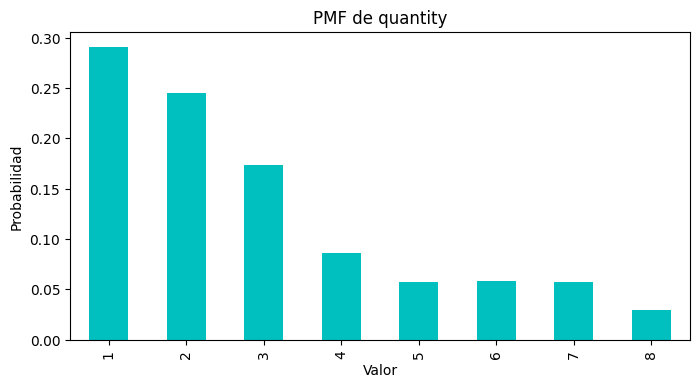

In [95]:
#Graficar la PMF (Función de Probabilidad de Masas
for column in discrete_columns:
    pmf = data_copy[column].value_counts(normalize=True).sort_index()

    plt.figure(figsize=(8, 4))
    pmf.plot(kind='bar', color='c')
    plt.title(f'PMF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad')
    plt.show()

El gráfico de la Función de Probabilidad de Masa (PMF) de quantity muestra una distribución sesgada a la derecha, donde los valores más bajos son los más frecuentes:

* La moda es 1, lo que indica que la mayoría de las órdenes de compra contienen un solo producto.
* Las probabilidades disminuyen progresivamente a medida que aumenta la cantidad, lo que sugiere que las compras grandes son poco comunes.
* Los valores entre 1 y 3 concentran la mayoría de los pedidos, mientras que cantidades de 5 o más tienen probabilidades inferiores al 6%.

conclusion:  La gran mayoría de los clientes realizan pedidos pequeños, probablemente enfocados en necesidades puntuales o reposición de artículos individuales.

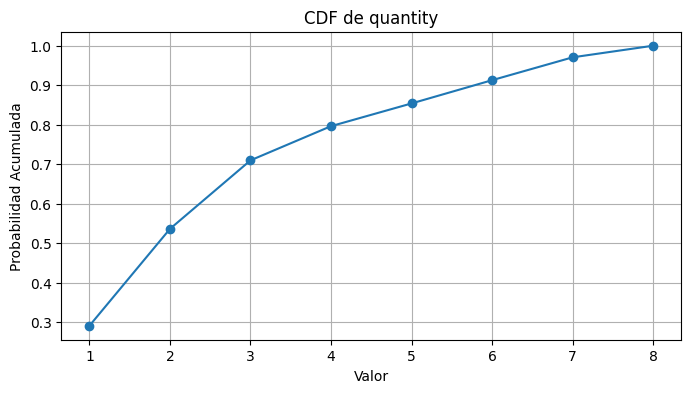

In [96]:
#Luego Grafico la CDF (Función de Distribución Acumulada)
for column in discrete_columns:
    pmf = data_copy[column].value_counts(normalize=True).sort_index()
    cdf = np.cumsum(pmf)

    plt.figure(figsize=(8, 4))
    plt.plot(cdf.index, cdf, marker='o', linestyle='-')
    plt.title(f'CDF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad Acumulada')
    plt.grid()
    plt.show()

El CDF de quantity podems observar cómo se acumulan las probabilidades conforme aumenta la cantidad de productos por compra. El gráfico muestra una curva de crecimiento rápido en los primeros valores , lo que indica una alta concentración de ventas en cantidades pequeñas.

Hallazgos por variable:
*el 90% de las compras contienen 5 productos o menos , lo que confirma que las transacciones grandes son inusuales.
*La curva es empinada al inicio y se aplana rápidamente , reflejando que la mayoría de las órdenes se concentran en valores bajos (1 a 3 productos) .
*A partir de 6 unidades, la curva se estabiliza, evidenciando que las compras con más de 6 productos son muy poco frecuentes .
Conclusión
Hay oportunidad para segmentación y estrategias
Las órdenes con muchos ítems (6 o más) representan una minoría , pero pueden ser analizadas como segmento de alto valor o nicho específico.
Se podría explorar la posibilidad de incentivar compras mayores mediante descuentos por volumen o promociones.

In [97]:
#ahora continuo con las variables categoricas
# Seleccionar solo las variables categóricas
categorical_columns = data_copy.select_dtypes(include=['object', 'category']).columns

In [98]:
#obtenemos la Frecuencia de Cada Categoría
for column in categorical_columns:
    print(f'\n\n📊 **Análisis para la variable categórica: {column}**\n')
    print(data_copy[column].value_counts())



📊 **Análisis para la variable categórica: order_date**

order_date
2019-12-21    222
2020-01-04    219
2019-12-28    215
2018-12-29    206
2020-02-22    204
             ... 
2017-09-10      1
2017-08-20      1
2017-08-27      1
2016-10-16      1
2017-10-01      1
Name: count, Length: 1641, dtype: int64


📊 **Análisis para la variable categórica: delivery_date**

delivery_date
2019-12-28    211
2020-01-04    201
2018-12-29    194
2020-01-01    190
2019-12-21    186
             ... 
2020-11-15      1
2016-07-17      1
2017-01-22      1
2017-09-10      1
2021-02-26      1
Name: count, Length: 1706, dtype: int64


📊 **Análisis para la variable categórica: product_name**

product_name
Adventure Works Desktop PC2.30 MD230 Black             162
Adventure Works Desktop PC2.30 MD230 White             158
WWI Desktop PC1.80 E1800 White                         158
WWI Desktop PC1.60 E1600 Black                         158
WWI Desktop PC1.80 E1801 Black                         157
            

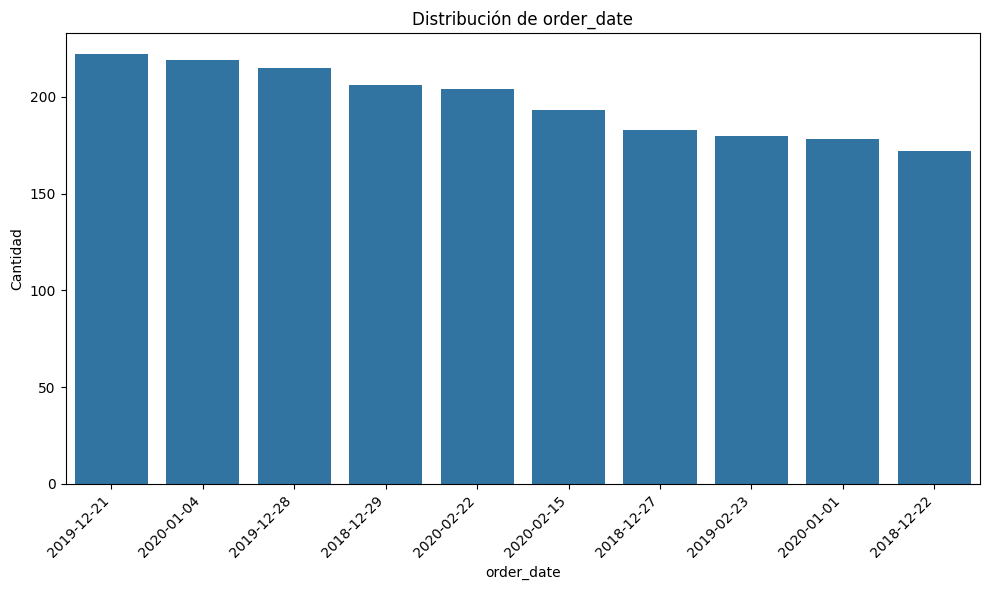

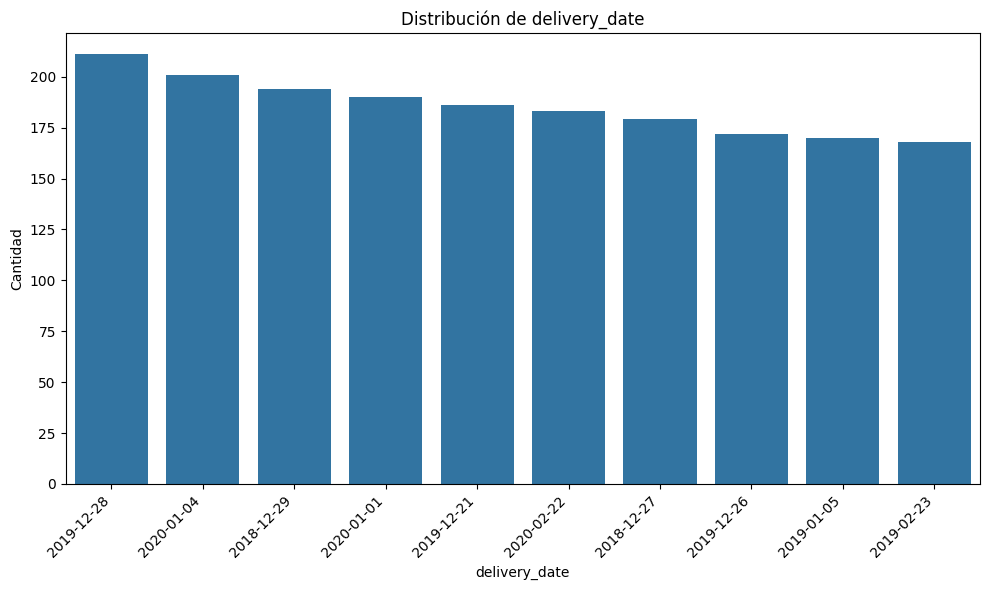

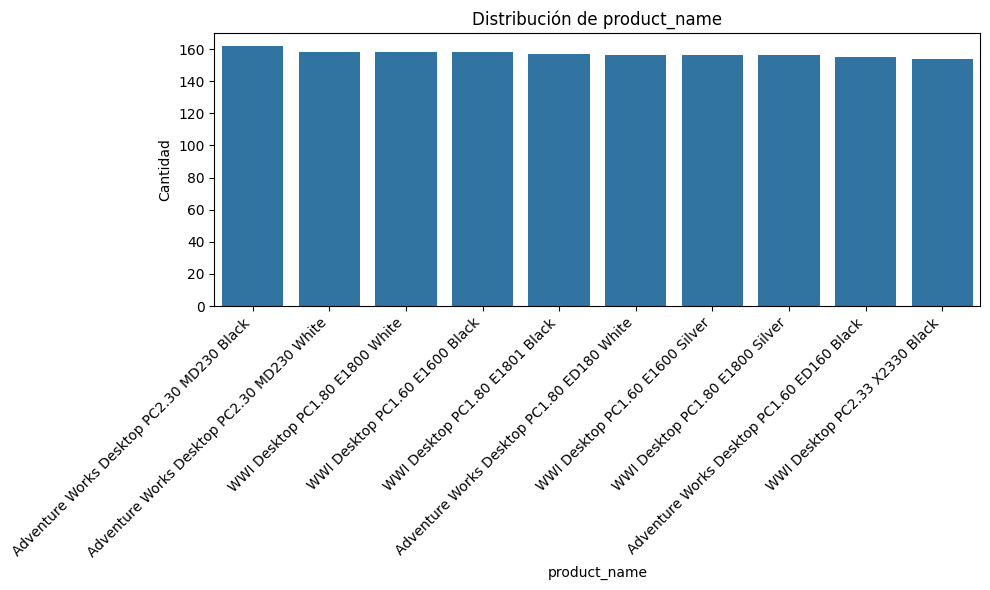

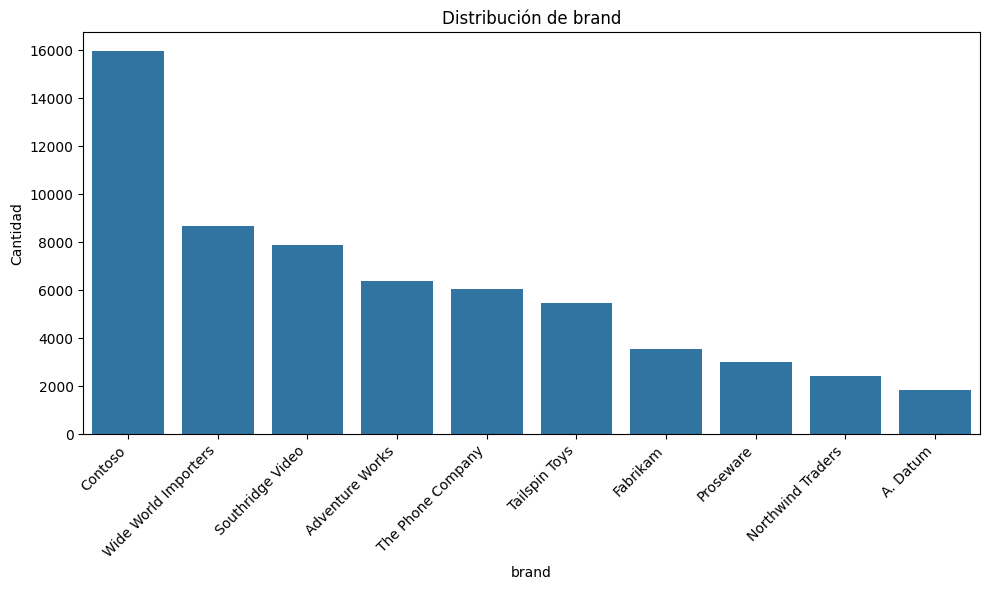

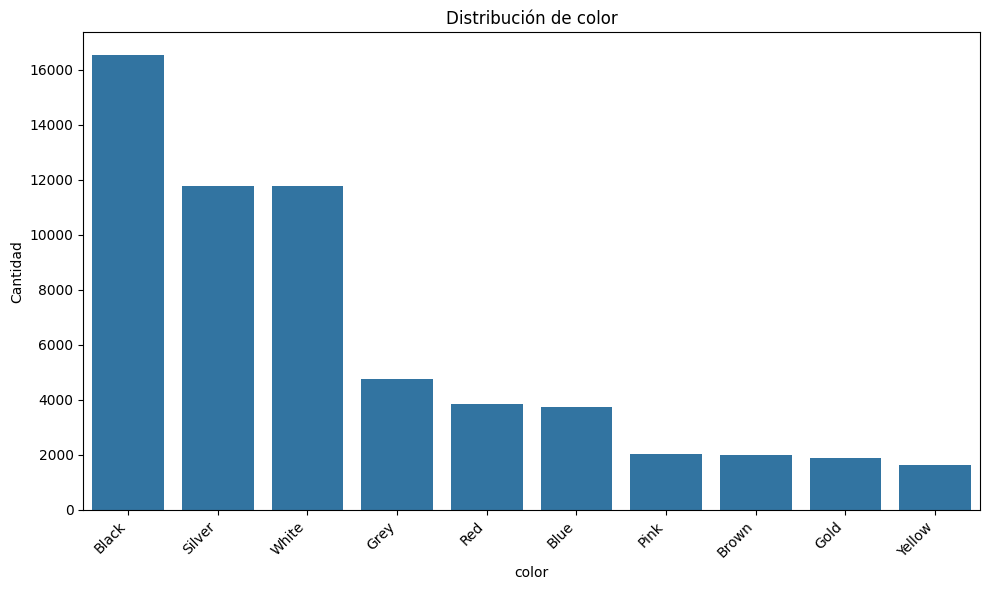

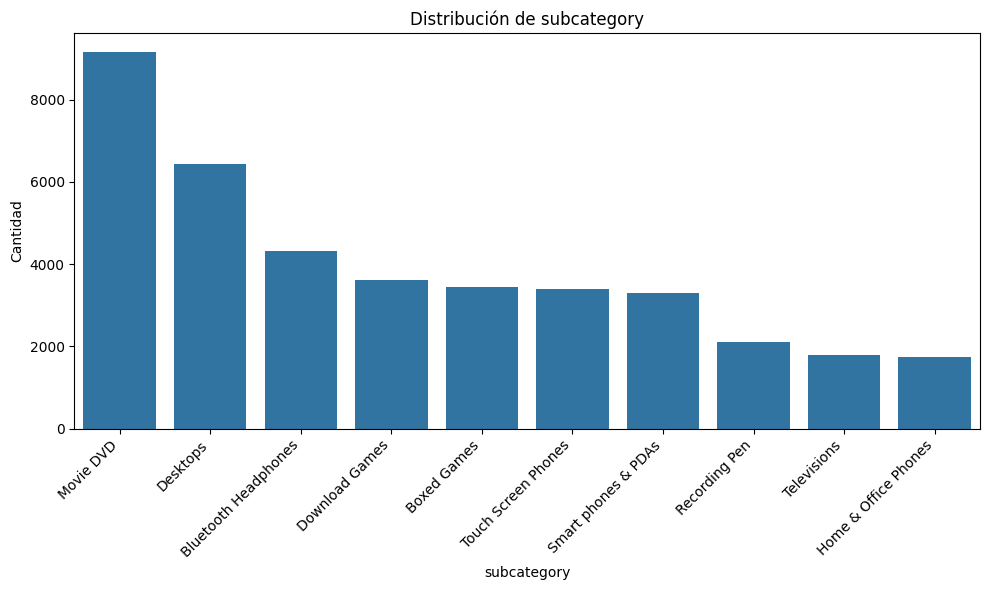

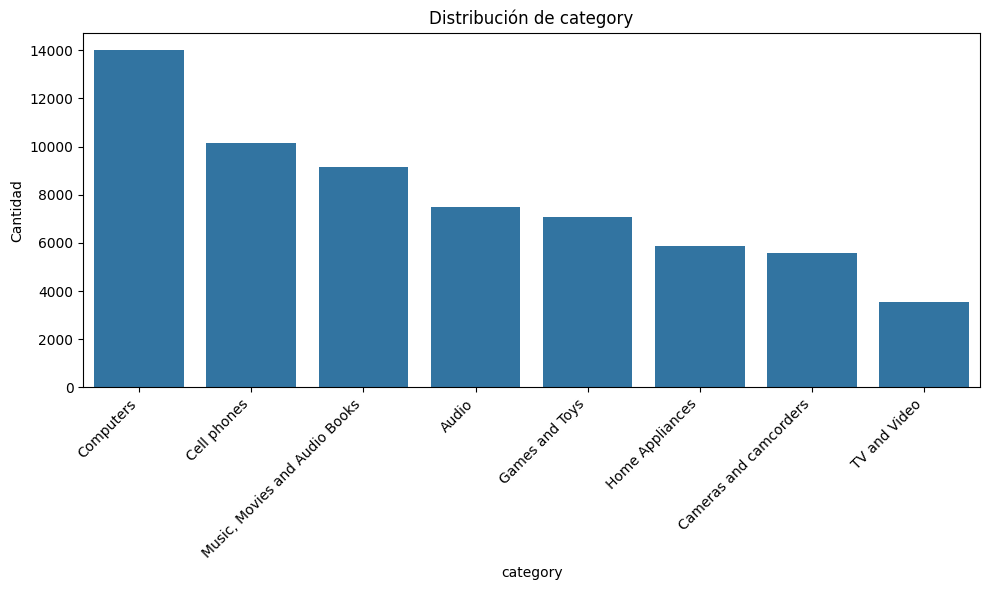

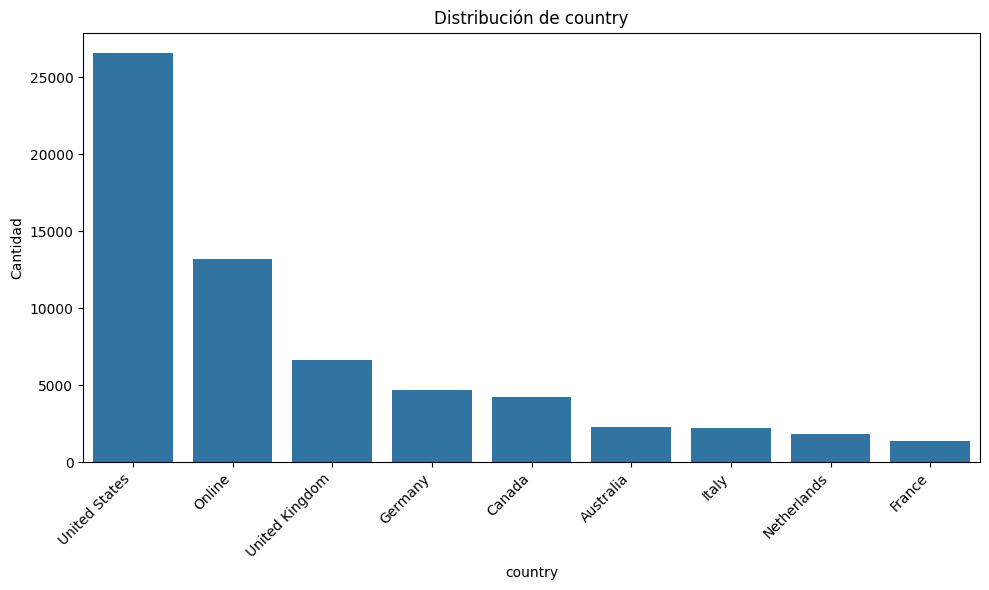

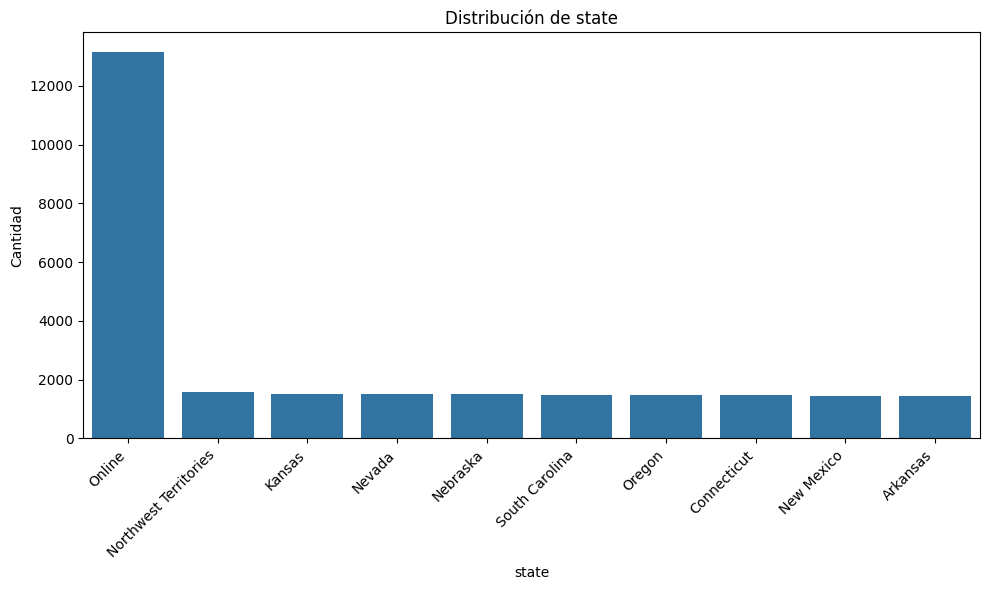

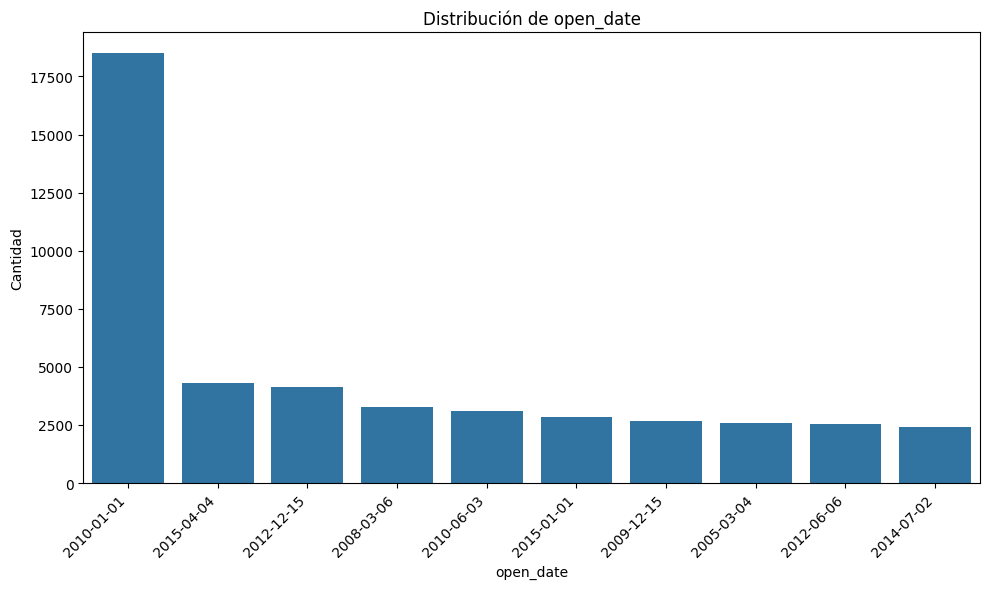

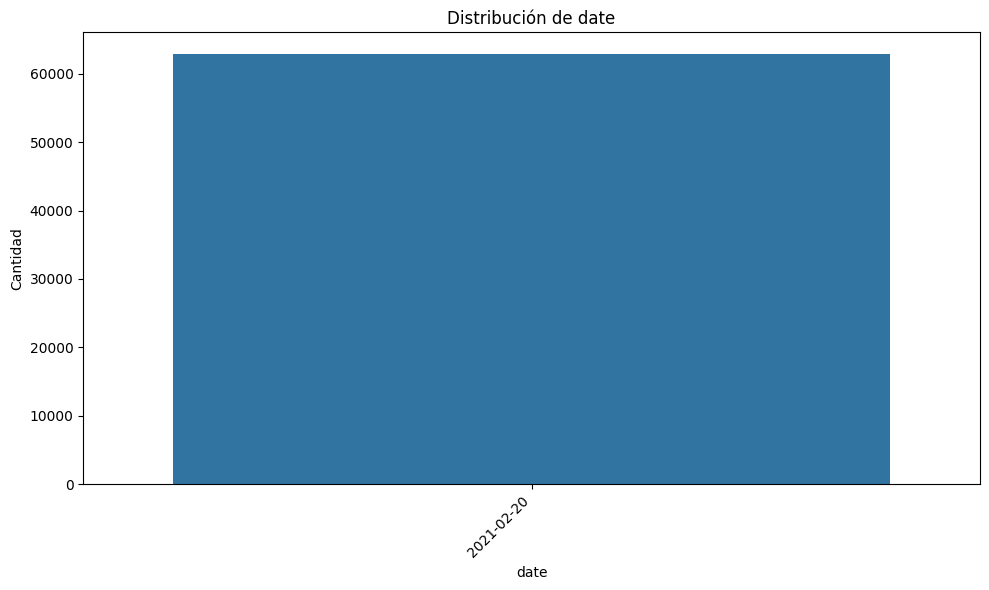

In [99]:
#visulaizamos la distribucion de categorias
for column in categorical_columns:
    # Obtener frecuencias de las categorías
    category_counts = data_copy[column].value_counts().head(10)

    # Crear gráfico de barras personalizado
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)

    # Personalizar el gráfico
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas después de crear el gráfico
    plt.tight_layout()
    plt.show()

In [100]:
#fracuencia de categorias
for column in categorical_columns:
    print(f'\n\n **Análisis para la variable categórica: {column}**\n')
    print(data_copy[column].value_counts())



 **Análisis para la variable categórica: order_date**

order_date
2019-12-21    222
2020-01-04    219
2019-12-28    215
2018-12-29    206
2020-02-22    204
             ... 
2017-09-10      1
2017-08-20      1
2017-08-27      1
2016-10-16      1
2017-10-01      1
Name: count, Length: 1641, dtype: int64


 **Análisis para la variable categórica: delivery_date**

delivery_date
2019-12-28    211
2020-01-04    201
2018-12-29    194
2020-01-01    190
2019-12-21    186
             ... 
2020-11-15      1
2016-07-17      1
2017-01-22      1
2017-09-10      1
2021-02-26      1
Name: count, Length: 1706, dtype: int64


 **Análisis para la variable categórica: product_name**

product_name
Adventure Works Desktop PC2.30 MD230 Black             162
Adventure Works Desktop PC2.30 MD230 White             158
WWI Desktop PC1.80 E1800 White                         158
WWI Desktop PC1.60 E1600 Black                         158
WWI Desktop PC1.80 E1801 Black                         157
               

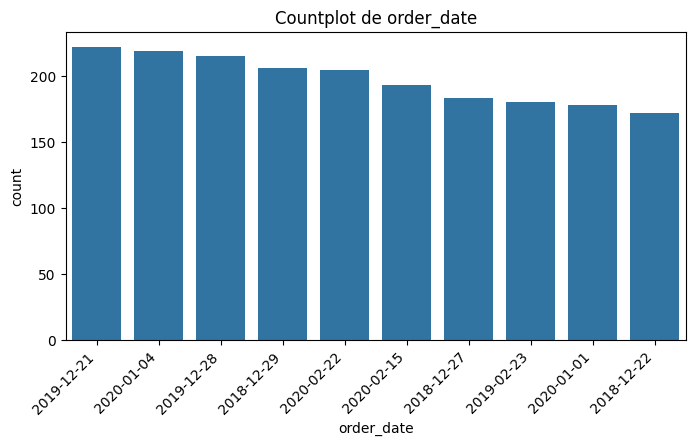

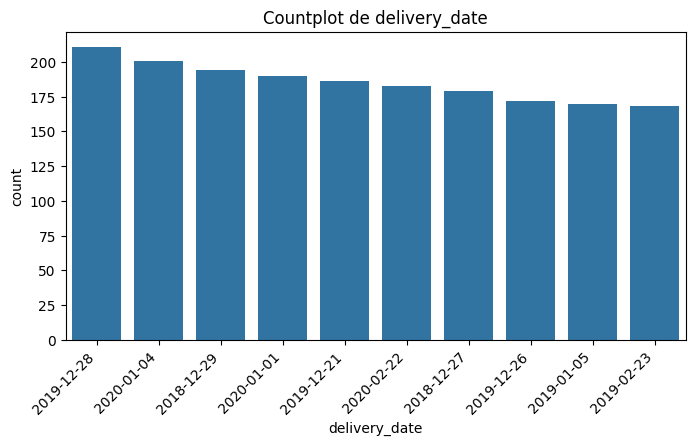

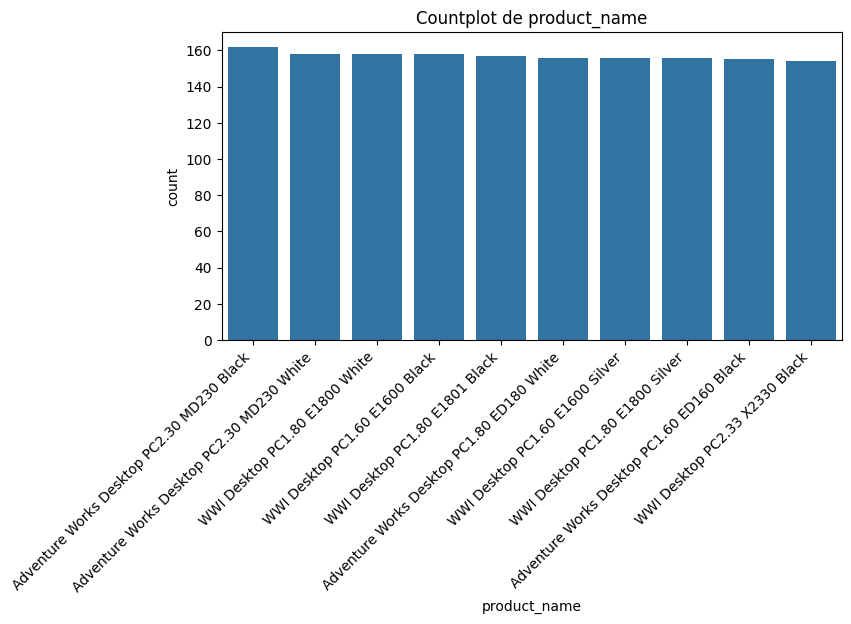

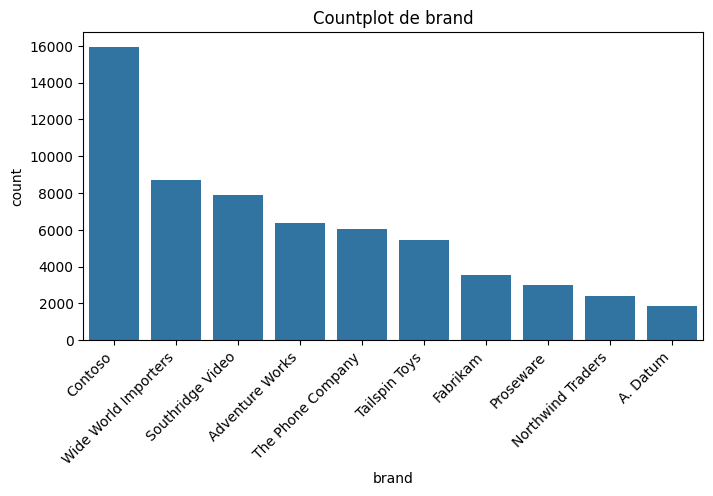

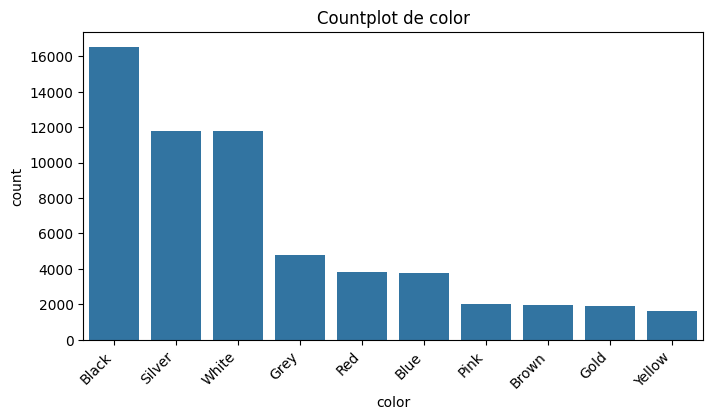

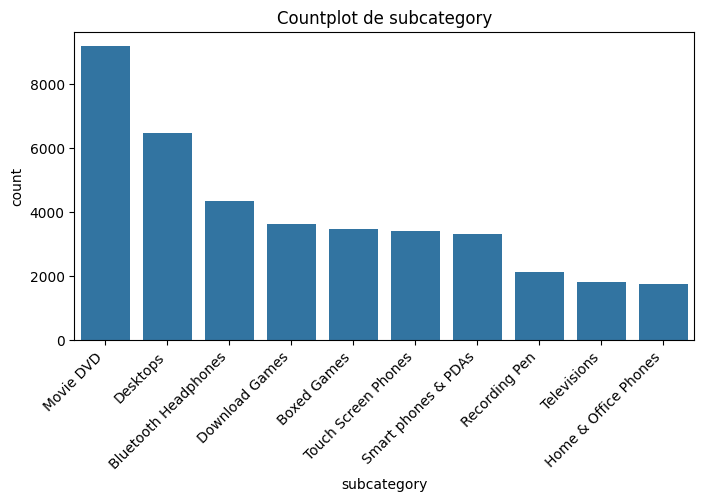

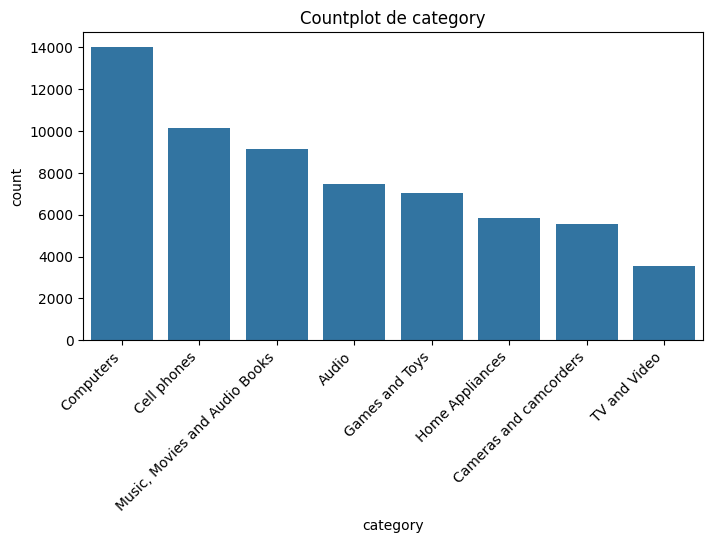

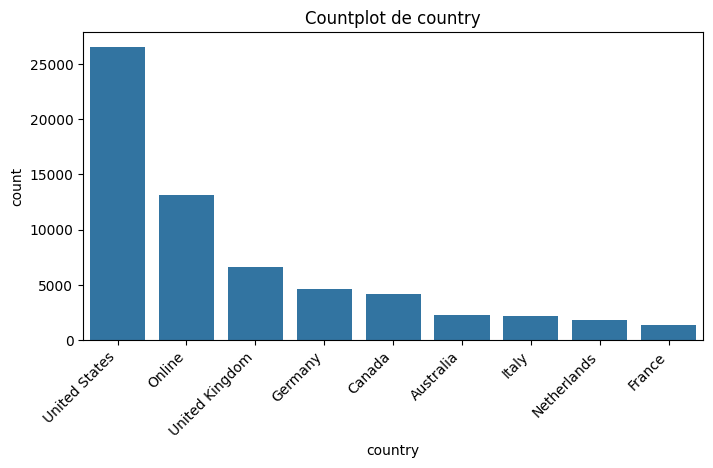

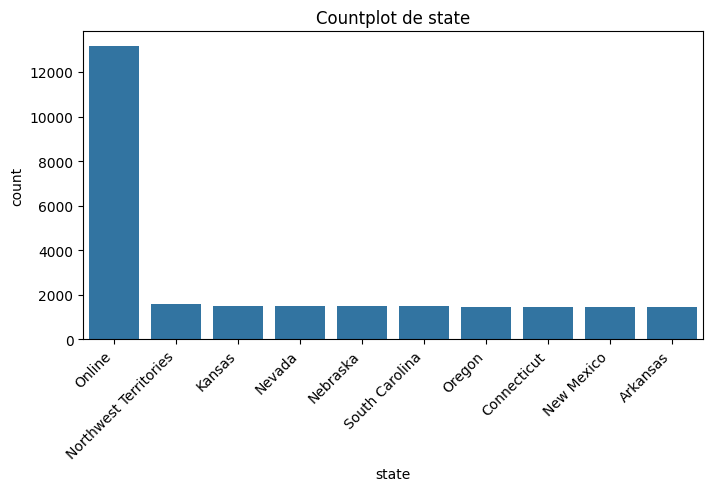

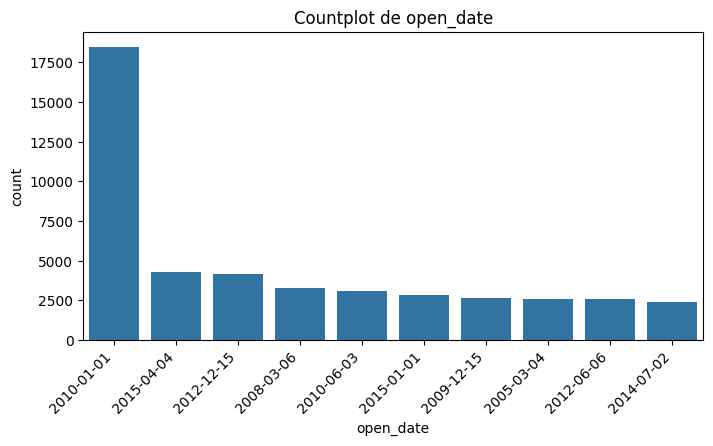

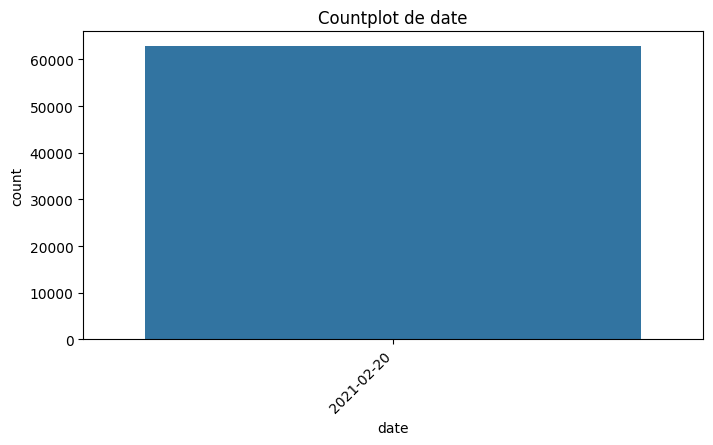

In [101]:
#visulizar la distribucion de categorias
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data_copy[column], order=data_copy[column].value_counts().head(10).index)
    plt.title(f'Countplot de {column}')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas
    plt.show()

### Análisis de Variables Categóricas

A continuación, se presenta una interpretación más clara y humana de las principales variables categóricas del dataset. Esto ayuda a comprender mejor el comportamiento de los datos y orientar decisiones estratégicas.

---

#### order_date (Fecha de Orden)
- Hay 1641 fechas únicas.
- Fechas como **2019-12-21** y **2020-01-04** se repiten con mayor frecuencia.
- **Conclusión:** Existen ciertos días con picos de pedidos, posiblemente relacionados con promociones, fines de semana o eventos comerciales importantes.

---

#### delivery_date (Fecha de Entrega)
- Aparecen 1706 fechas distintas.
- Fechas como **2019-12-28** y **2020-01-04** destacan por su frecuencia.
- **Conclusión:** Las entregas muestran patrones similares a las órdenes, y podrían estar afectadas por la logística y tiempos de procesamiento.

---

#### product_name (Nombre del Producto)
- El dataset contiene 2492 productos distintos.
- Sin embargo, productos como **"Adventure Works Desktop PC2.30 MD230 Black"** se repiten mucho.
- **Conclusión:** Aunque hay una gran variedad de productos, unos pocos concentran la mayoría de las ventas. Esto sugiere un patrón de larga cola: unos pocos productos generan la mayor parte del ingreso.

---

####  brand (Marca)
- Hay 11 marcas en total.
- Las marcas **Contoso**, **Wide World Importers** y **Southridge Video** son las más destacadas.
- **Conclusión:** El negocio está dominado por unas pocas marcas. Es importante concentrar promociones o relaciones comerciales en ellas.

---

####  color (Color del Producto)
- 16 colores únicos.
- Los colores más populares son **Negro, Plateado y Blanco**.
- **Conclusión:** Los clientes tienden a preferir colores clásicos o neutros. Esto puede influir en decisiones de stock y diseño de productos.

---

####  subcategory (Subcategoría del Producto)
- Se observan 32 subcategorías.
- Las más vendidas son **Movie DVD**, **Desktops**, y **Bluetooth Headphones**.
- **Conclusión:** Algunas subcategorías tienen mayor demanda, lo cual debe ser considerado para ajustar el inventario o campañas específicas.

---

####  category (Categoría Principal)
- 8 categorías diferentes.
- Las más comunes son **Computers**, **Cell phones** y **Music, Movies and Audio Books**.
- **Conclusión:** La tecnología domina el catálogo. Son las líneas más fuertes de la empresa y conviene enfocar recursos en ellas.

---

#### country (País de la Tienda o Cliente)
- 9 países representados.
- El top está liderado por **Estados Unidos**, seguido de **Ventas Online** y **Reino Unido**.
- **Conclusión:** El mercado estadounidense y el canal online son clave para el negocio. Merecen atención prioritaria.

---

####  state (Estado o Región)
- 58 regiones distintas.
- La opción **Online** encabeza la lista, luego siguen territorios como **Northwest Territories** y **Kansas**.
- **Conclusión:** Las ventas online tienen un peso significativo. Podría ser conveniente separarlas del análisis de tiendas físicas.

---

####  open_date (Fecha de Apertura de la Tienda)
- 23 fechas diferentes.
- Muchas tiendas figuran con **2010-01-01**, lo cual podría ser una fecha imputada por defecto.
- **Conclusión:** Es importante validar esta variable. Si se trata de una fecha genérica, podría no tener valor analítico.

---

####  date (Fecha de Procesamiento)
- Todas las filas tienen el mismo valor: **2021-02-20**.
- **Conclusión:** Esta columna parece no aportar información útil para el análisis y puede eliminarse si no cumple otro propósito.

---



**4.4 Conclusiones del Análisis Univariado:**

Resume los hallazgos más importantes del análisis univariado:

-   ¿Qué has aprendido sobre cada variable individualmente?
-   ¿Hay algo inusual o inesperado en las distribuciones?
-   ¿Qué variables parecen ser más informativas o relevantes para los objetivos del análisis?
-   ¿Qué te sugieren las medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad sobre la naturaleza de cada variable?

### Conclusiones del Análisis Univariado

####  ¿Qué hemos aprendido sobre las variables?
- Las variables **numéricas** como `quantity`, `unit_price_usd`, `unit_cost_usd` y `total_profit` presentan una alta dispersión y sesgo positivo.
- La variable `quantity` muestra que la mayoría de las órdenes contienen **1 a 3 productos**, con una moda de 1 y una asimetría de aproximadamente 1.33.
- El **producto más vendido** es `Adventure Works Desktop PC2.30 MD230 Black`, lo cual se observó claramente en el gráfico de barras.
- Los productos con mayor ganancia total incluyen:
  1. Adventure Works Desktop PC2.30 MD230 Black
  2. Contoso 18.5 Monitor
  3. Southridge Laptop15L Pink
  4. Contoso Wireless Mouse
  5. Tailspin Standard Keyboard
- Las marcas más frecuentes en las ventas fueron **Contoso** y **Wide World Importers**.
- Las categorías más populares son **Computers**, **Cell phones**, y **Music, Movies and Audio Books**.
- En términos geográficos, los **Estados Unidos** y el canal **Online** lideran en cantidad de ventas.

####  ¿Hay algo inusual o inesperado?
- La columna `date` contiene un único valor (`2021-02-20`), lo que indica que **no aporta información útil**.
- Muchas tiendas comparten la misma fecha de apertura (`2010-01-01`), probablemente debido a una imputación por defecto.
- La presencia de **"Online" como estado** en muchas ventas refleja una alta proporción de pedidos digitales, que deben tratarse como un canal separado.

####  ¿Qué variables son más informativas?
- Las más relevantes para los objetivos del negocio son:
  - `quantity`: para medir volumen de ventas.
  - `total_profit`: para evaluar rentabilidad.
  - `unit_price_usd` y `unit_cost_usd`: para calcular márgenes.
  - `product_name`, `category` y `country`: para segmentar por productos y localización.

####  ¿Qué dicen las estadísticas y funciones de probabilidad?
- En `quantity`, la **moda es 1**, la **mediana es 2** y la **curtosis** sugiere colas más pesadas que una distribución normal.
- La **PMF** muestra que casi el 30% de las órdenes son de solo 1 producto.
- La **CDF** de `quantity` revela que más del 90% de las órdenes tienen **menos de 5 productos**.
- Las variables categóricas muestran que unas pocas categorías concentran la mayoría de las ventas.
- Esto sugiere que **el negocio se apoya fuertemente en un conjunto limitado de productos clave**, lo cual es importante para la planificación de stock, marketing y expansión.

---


In [102]:
1-¿Qué has aprendido sobre cada variable individualmente?

 Variables Numéricas:

quantity (Cantidad de productos por venta):
* Moda = 1 → La mayoría de las compras son de un solo producto.
* Distribución sesgada a la derecha, lo que indica que compras grandes son menos comunes.

unit_cost_usd (Costo Unitario del Producto):
* Media = $124.01, Mediana = $82.77 → Los productos más comunes son de bajo costo, pero hay algunos mucho más caros que influyen en la media.
* Alta curtosis (14.11) → Existen valores extremos altos que generan una distribución con colas largas.

total_profit (Ganancia Total por Venta):
* Distribución sesgada a la derecha, indicando que algunas ventas generan mucho más margen de ganancia que otras.
* Mediana y moda = $205.67, lo que sugiere que la mayoría de las órdenes generan una ganancia cercana a este valor.

 Variables Categóricas:

brand → Contoso y Wide World Importers dominan el mercado, indicando que la empresa trabaja con un grupo selecto de proveedores.
color → Negro, Plata y Blanco son los colores más vendidos, lo que sugiere una fuerte preferencia por colores neutros en tecnología.
category → Computadoras y Teléfonos son las categorías con más ventas, lo que indica que estos productos lideran la demanda.
country → Estados Unidos y Ventas Online representan la mayor parte de las transacciones, lo que sugiere un enfoque en mercados digitales.
2-¿Hay algo inusual o inesperado en las distribuciones?

* En las variables numéricas:
Distribuciones muy sesgadas → La mayoría de las variables presentan valores atípicos hacia la derecha, lo que indica que algunas transacciones son mucho más altas en costo o ganancia que el promedio.
Alta curtosis en unit_cost_usd → Hay productos extremadamente caros que distorsionan la distribución.
quantity está muy concentrada en 1 unidad → La mayoría de las compras son pequeñas, lo que puede afectar la estrategia de ventas.

* En las variables categóricas:
Pocas marcas dominan las ventas, lo que indica que la empresa podría depender de un grupo limitado de proveedores.
El color Negro es mucho más común que otros, lo que puede reflejar una estrategia de producción o preferencia del mercado.
Las ventas están concentradas en unos pocos países, lo que puede limitar la diversificación del negocio.

3-¿Qué variables parecen ser más informativas o relevantes para los objetivos del análisis?

*Para analizar qué productos son más vendidos y rentables:
quantity (Cantidad de productos por venta) → Nos indica qué productos tienen más rotación.
unit_cost_usd y unit_price_usd → Ayudan a calcular los márgenes de ganancia.
total_profit → Indica qué productos generan más ingresos netos.

*Para evaluar las tiendas más rentables y los mejores mercados:
country → Permite ver en qué países hay más ventas.
category → Indica qué tipos de productos son más populares.
open_date → Puede revelar patrones sobre qué tiendas han sido más exitosas en el tiempo.

*Para tomar decisiones estratégicas:
brand → Ayuda a identificar qué marcas generan más ventas.
color → Puede influir en estrategias de producción y marketing.
category → Determina qué productos deben recibir más promoción o inversión.

4-¿Qué te sugieren las medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad sobre la naturaleza de cada variable?

*Tendencia Central (edia, Mediana, Moda):
En muchas variables (como total_profit y unit_cost_usd), la media es mayor que la mediana, lo que indica distribuciones sesgadas a la derecha con valores extremos altos.
Moda en las variables categóricas revela que algunas marcas, colores y categorías dominan el mercado.

*Dispersión y Variabilidad:
Alta dispersión en unit_cost_usd → Indica una gran diferencia entre los productos más baratos y los más caros.
Variabilidad moderada en quantity → La mayoría de los valores están cerca de 1-4 unidades por compra.

   *Curtosis y Asimetría:
unit_cost_usd tiene una curtosis extrema (14.11) → Indica que hay productos extremadamente caros que afectan la distribución.
La mayoría de las variables numéricas tienen asimetría positiva, lo que indica que la mayoría de los valores son bajos, pero existen algunos casos excepcionalmente altos.

   *Funciones de Probabilidad (PMF y CDF):
La PMF de quantity muestra que la mayoría de las compras contienen 1 solo producto.
Las CDF muestran que más del 80% de las ventas están concentradas en pocas categorías y colores, lo que indica que la empresa depende fuertemente de ciertos productos.

 Conclusión General
* Las ventas están concentradas en pocos productos, colores y marcas, lo que indica que los clientes tienen preferencias claras.
* Las variables numéricas tienen valores atípicos altos, lo que sugiere que algunas transacciones son muy diferentes al promedio.
* Las ventas online y en EE.UU. dominan el mercado, lo que sugiere una fuerte dependencia de estos canales.
* Las medidas de dispersión y asimetría revelan que muchas variables tienen valores extremos, lo que puede afectar análisis futuros si no se consideran adecuadamente.

IndentationError: unexpected indent (3527016178.py, line 3)

In [ ]:
# -- Escribe aquí tus conclusiones --

## 5. Análisis bivariado


In [112]:
#Para continuar con el analisis bivariado lo primero que voy a hacer es agregarle una columna de margen de ganancia en porcentaje a mi archivo ventas_limpio,copia.csv.
# Cargar el archivo CSV
file_path = 'D:\\global electronic\\ventas_limpio,corregido.csv'  # o la ruta donde lo tengas
data = pd.read_csv(file_path)

In [113]:
#ahora agrego Margen a mi archivo .csv
data['Margen (%)'] = ((data['unit_price_usd'] - data['unit_cost_usd']) / data['unit_price_usd']) * 100

In [ ]:
#ahora guarde el archivo con magen%
output_path = 'ventas_limpio_con_margen%.csv'
data.to_csv(output_path, index=False)

In [117]:
data = pd.read_csv('D:\\global electronic\\ventas_limpio_con_margen%.csv')

In [ ]:
#aca ya ouedo ver la columna nueva de margen%
print(data.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'product_name',
       'brand', 'color', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'subcategory', 'categorykey', 'category', 'country', 'state',
       'square_meters', 'open_date', 'date', 'total_profit', 'Margen (%)'],
      dtype='object')


In [125]:
#Agrupo por productkey y calculo las métricas necesarias
productos_rentabilidad = data.groupby('productkey').agg({
    'product_name': 'first',        # Tomar un nombre representativo
    'quantity': 'sum',              # Total de unidades vendidas
    'total_profit': 'sum',          # Ganancia total en USD
    'Margen (%)': 'mean'            # Margen promedio en porcentaje
}).reset_index()

In [132]:
#los 5 productos por ganancia total 
top_5_ganancia = productos_rentabilidad.sort_values(by='total_profit', ascending=False).head(5)
print(top_5_ganancia)

     productkey                                 product_name  quantity  \
421         423   Adventure Works Desktop PC2.30 MD230 Black       491   
432         434   Adventure Works Desktop PC2.30 MD230 White       454   
415         417  Adventure Works Desktop PC2.30 MD230 Silver       452   
437         439               WWI Desktop PC2.30 M2300 Brown       426   
449         451              WWI Desktop PC2.30 M2300 Silver       426   

     total_profit  Margen (%)  
421  91360.401583   38.247588  
432  88377.367768   39.869067  
415  85311.576504   33.793759  
437  80029.803896   54.014311  
449  76810.813027   54.014311  


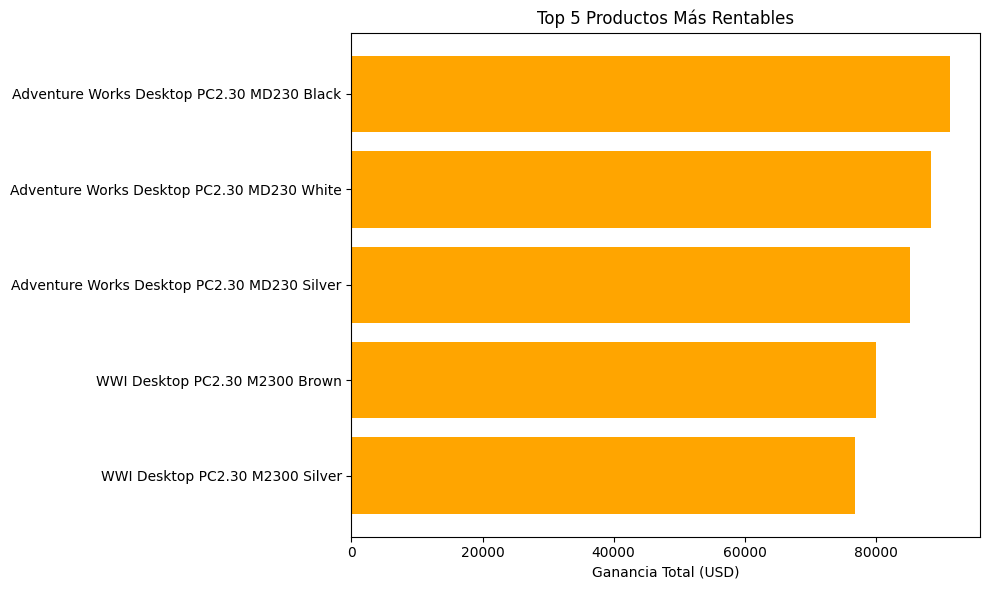

In [130]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_ganancia['product_name'], top_5_ganancia['total_profit'], color='orange')
plt.xlabel('Ganancia Total (USD)')
plt.title('Top 5 Productos Más Rentables')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [133]:
#los 5 productos por margen promedio
top_5_margen = productos_rentabilidad.sort_values(by='Margen (%)', ascending=False).head(5)
print(top_5_margen)

      productkey                                  product_name  quantity  \
1628        1630   Contoso DVD 60 DVD Storage Binder L20 Black       254   
1638        1640     Contoso DVD 60 DVD Storage Binder L20 Red       252   
1583        1585        SV DVD 60 DVD Storage Binder L20 Black       274   
1633        1635  Contoso DVD 60 DVD Storage Binder L20 Silver       288   
1593        1595          SV DVD 60 DVD Storage Binder L20 Red       249   

      total_profit  Margen (%)  
1628   4134.999711   66.885103  
1638   4367.580645   66.885103  
1583   4857.392428   66.885103  
1633   4936.522309   66.885103  
1593   4465.851156   66.885103  


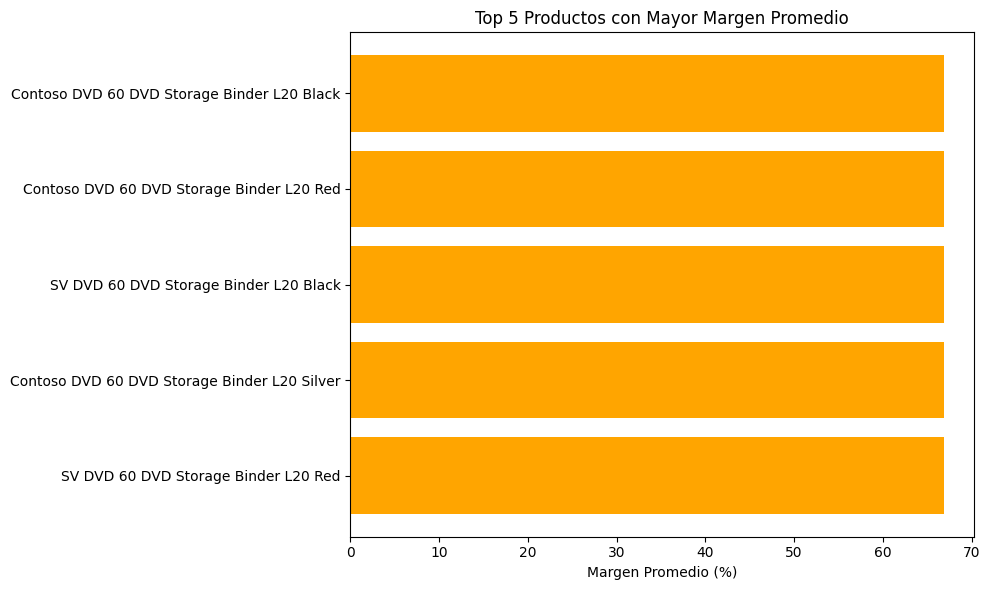

In [135]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_margen['product_name'], top_5_margen['Margen (%)'], color='orange')
plt.xlabel('Margen Promedio (%)')
plt.title('Top 5 Productos con Mayor Margen Promedio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [136]:
#los 5 productos menos rentables
cinco_menos_rentables = productos_rentabilidad.sort_values(by='total_profit', ascending=True).head(5)
print(cinco_menos_rentables)

      productkey                                       product_name  quantity  \
919          921                      SV USB Data Cable E600 Silver        16   
924          926               SV USB Sync Charge Cable E700 Silver         8   
2419        2445  Litware 80mm Dual Ball Bearing Case Fan E1001 ...         4   
2413        2439         Litware 120mm Blue LED Case Fan E901 Black         3   
920          922                        SV USB Data Cable E600 Grey         9   

      total_profit  Margen (%)  
919       7.520000   49.473684  
924       8.235246   49.246231  
2419     11.372068   49.098196  
2413     12.671610   49.049049  
920      12.812286   49.473684  


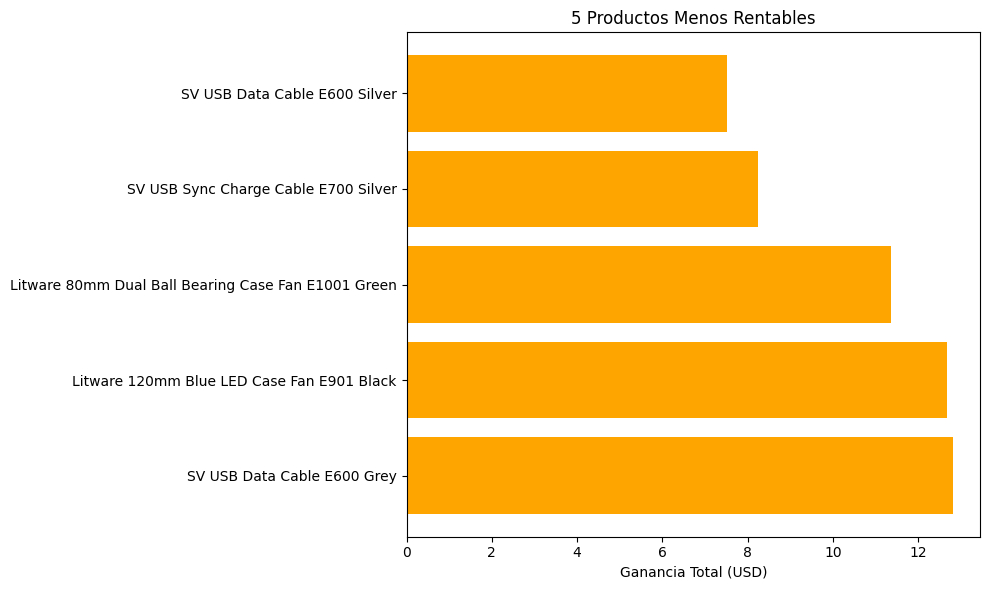

In [138]:
#garfico de 5 productos menos rentables
plt.figure(figsize=(10, 6))
plt.barh(cinco_menos_rentables['product_name'], cinco_menos_rentables['total_profit'], color='orange')
plt.xlabel('Ganancia Total (USD)')
plt.title('5 Productos Menos Rentables')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

*Top 5 Productos Más Rentables (por ganancia total en USD)
Observamos:
Los productos más rentables son PCs de escritorio de las marcas Adventure Works y WWI.
Generan más de $75,000 USD cada uno.
Aunque sus márgenes no son los más altos, el volumen de ventas es elevado, lo que impulsa la rentabilidad.
Conclusiones:
Estos productos son clave para el negocio: alta demanda + ganancias sólidas.
Se deben mantener en stock y considerar estrategias de promoción cruzada.


*Top 5 Productos con Mayor Margen Promedio (%)
Observaciones hechas:
Incluyen principalmente organizadores de DVD (SV y Contoso).
Márgenes muy altos (66.9%), pero las ganancias totales son bajas ($4,000–5,000 USD).
Menor volumen de ventas en comparación con los PCs.
Conclusiones:
Son productos muy rentables por unidad, pero con baja rotación.
tienen potencial para campañas de marketing dirigidas.
Podrían incluirse como complementos o promociones junto a productos más populares.

*Cinco Productos Menos Rentables (por ganancia total)
Observo que:
Productos con ganancias totales muy bajas (algunos menos de $10 USD).
Principalmente cables y ventiladores de bajo costo y baja demanda.
En general, tienen márgenes aceptables (~49%), pero se venden poco.
Conclusiones:
Revisar inventario y rotación de estos productos.
Posible exceso de SKUs poco relevantes → oportunidad para depuración del portafolio.
Si se mantienen, podrían usarse como artículos promocionales o bonificaciones.


Tipo de Producto-----------------Acción Recomendada
Muy rentables (alta ganancia-----Mantener stock, incluir en estrategias clave
Alto margen, baja venta----------Promocionar, incluir como extra o bundle
Baja ganancia total--------------Reevaluar, reducir inventario, usar como extra


In [141]:
# Cargar el archivo con el margen ya incluido
data = pd.read_csv('ventas_limpio_con_margen%.csv')

In [146]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [147]:
#Agregar columna de ingresos por producto (precio * cantidad)
data['ingresos'] = data['unit_price_usd'] * data['quantity']

In [148]:
#Top 5 productos más vendidos (por cantidad)
productos_mas_vendidos = data.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(5)
print(productos_mas_vendidos)

product_name
WWI Desktop PC2.33 X2330 Black                527
Adventure Works Desktop PC1.60 ED160 Black    513
WWI Desktop PC1.80 E1800 White                507
Adventure Works Desktop PC2.30 MD230 Black    491
WWI Desktop PC1.60 E1600 Black                485
Name: quantity, dtype: int64


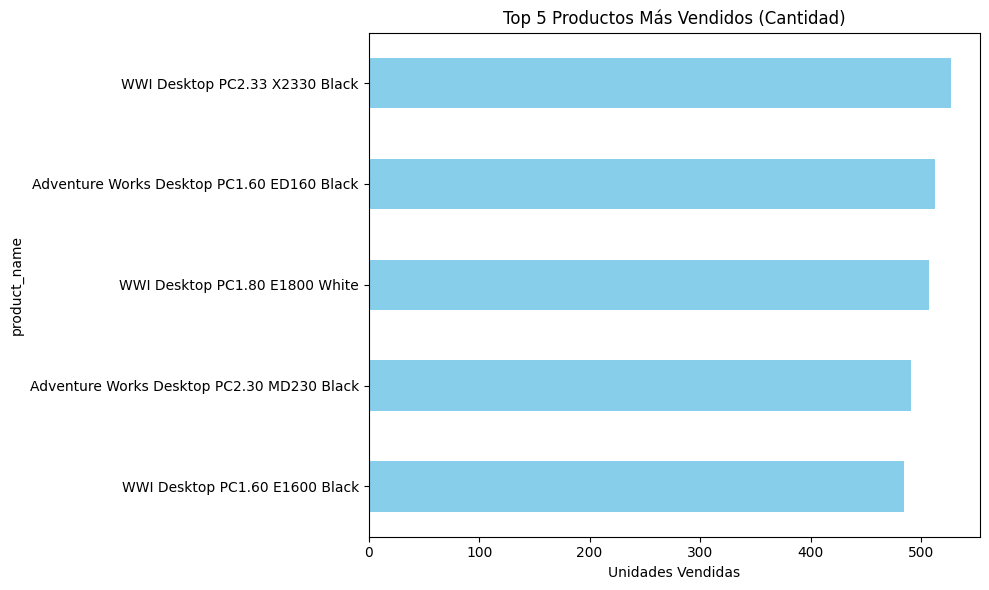

In [159]:
plt.figure(figsize=(10, 6))
productos_mas_vendidos.plot(kind='barh', color='skyblue')
plt.title("Top 5 Productos Más Vendidos (Cantidad)")
plt.xlabel("Unidades Vendidas")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [149]:
#Top 5 productos con más ingresos
productos_mas_ingresos = data.groupby('product_name')['ingresos'].sum().sort_values(ascending=False).head(5)
print(productos_mas_ingresos)

product_name
Adventure Works Desktop PC2.30 MD230 Black    279979.242297
WWI Desktop PC2.30 M2300 White                257993.700238
WWI Desktop PC2.30 M2300 Brown                257840.089090
Adventure Works Desktop PC2.30 MD230 White    256848.644386
WWI Desktop PC2.30 M2300 Silver               256233.131355
Name: ingresos, dtype: float64


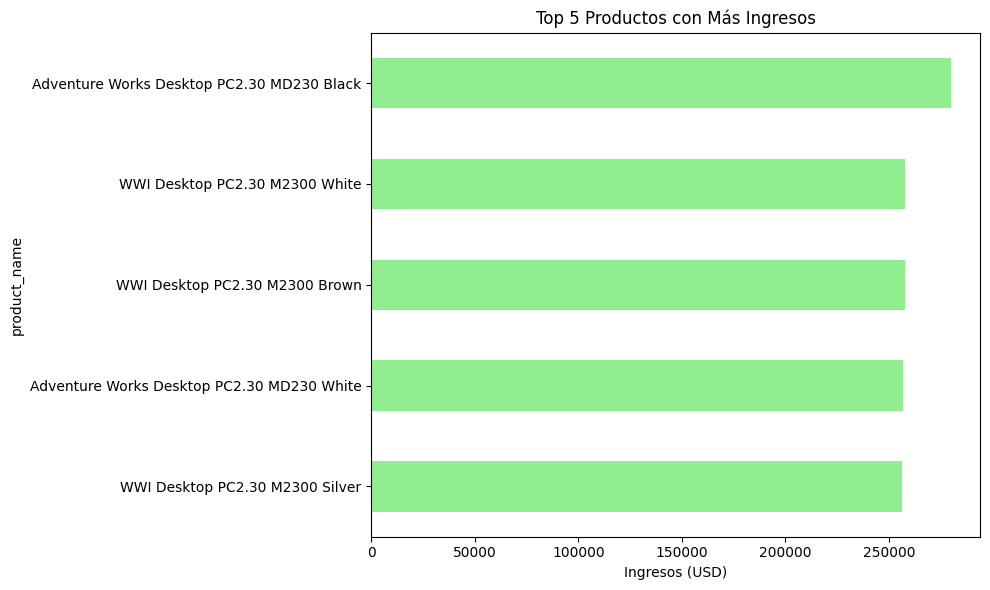

In [160]:
plt.figure(figsize=(10, 6))
productos_mas_ingresos.plot(kind='barh', color='lightgreen')
plt.title("Top 5 Productos con Más Ingresos")
plt.xlabel("Ingresos (USD)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [150]:
#Top 5 productos más rentables (por margen promedio)
productos_mayor_margen = data.groupby('product_name')['Margen (%)'].mean().sort_values(ascending=False).head(5)
print(productos_mayor_margen)

product_name
SV DVD 60 DVD Storage Binder L20 Red            66.885103
SV DVD 60 DVD Storage Binder L20 Black          66.885103
Contoso DVD 60 DVD Storage Binder L20 Silver    66.885103
SV DVD 60 DVD Storage Binder L20 Silver         66.885103
Contoso DVD 60 DVD Storage Binder L20 Red       66.885103
Name: Margen (%), dtype: float64


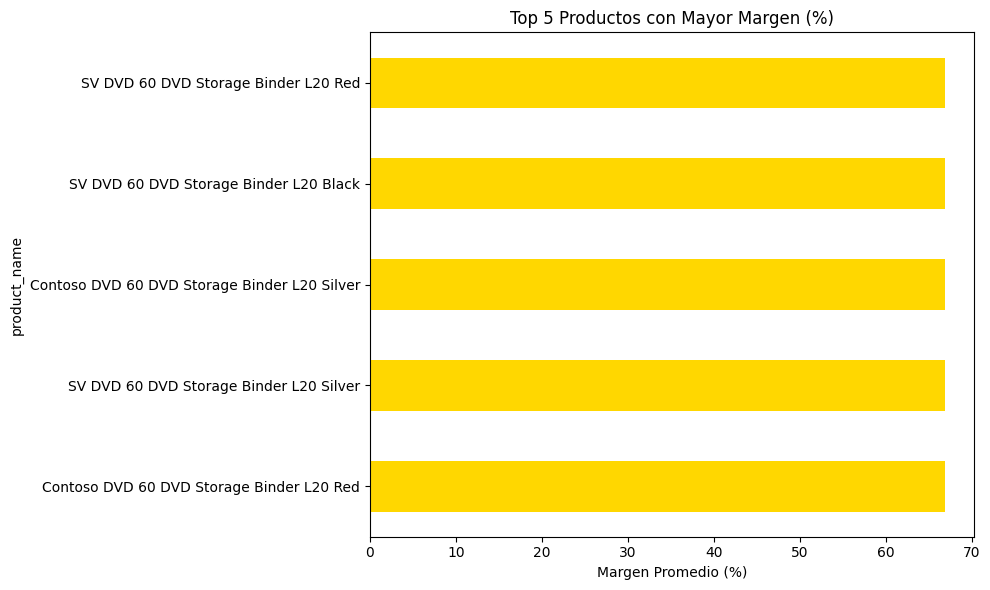

In [161]:
plt.figure(figsize=(10, 6))
productos_mayor_margen.plot(kind='barh', color='gold')
plt.title("Top 5 Productos con Mayor Margen (%)")
plt.xlabel("Margen Promedio (%)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [151]:
#Top 5 productos menos rentables (margen promedio más bajo
productos_menor_margen = data.groupby('product_name')['Margen (%)'].mean().sort_values().head(5)
print(productos_menor_margen)

product_name
Fabrikam Refrigerator 24.7CuFt X9800 Blue    -568.366977
Litware Refrigerator 24.7CuFt X980 Silver    -541.295081
Fabrikam Refrigerator 24.7CuFt X9800 Green   -537.610416
Litware Refrigerator 24.7CuFt X980 White     -533.560254
Contoso Washer & Dryer 25.5in M255 White     -521.308336
Name: Margen (%), dtype: float64


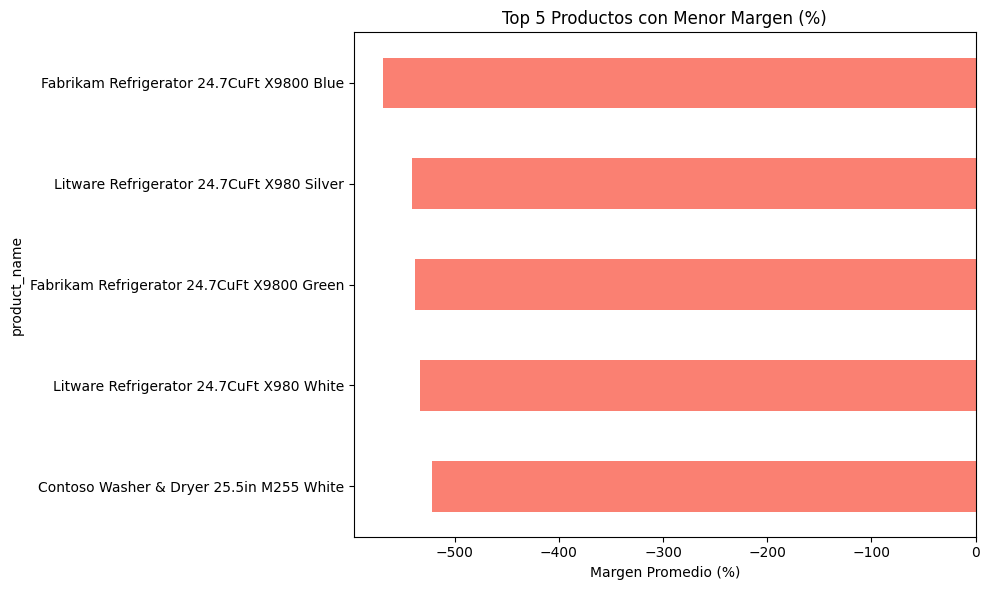

In [162]:
plt.figure(figsize=(10, 6))
productos_menor_margen.plot(kind='barh', color='salmon')
plt.title("Top 5 Productos con Menor Margen (%)")
plt.xlabel("Margen Promedio (%)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [153]:
#Top 3 países con mayor volumen de ventas
paises_mas_ventas = data.groupby('country')['quantity'].sum().sort_values(ascending=False).head(4)
print(paises_mas_ventas)

country
United States     77749
Online            38500
United Kingdom    19195
Germany           13847
Name: quantity, dtype: int64


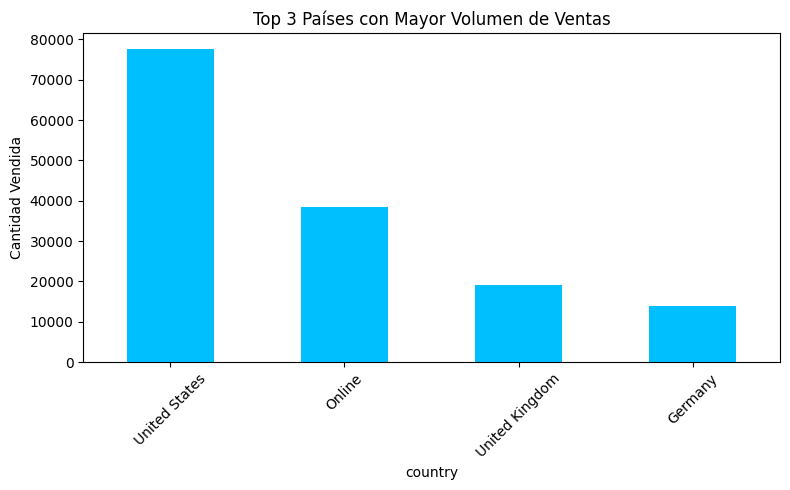

In [163]:
plt.figure(figsize=(8, 5))
paises_mas_ventas.plot(kind='bar', color='deepskyblue')
plt.title("Top 3 Países con Mayor Volumen de Ventas")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
#Top 3 estados con mayor volumen de ventas
estados_mas_ventas = data.groupby('state')['quantity'].sum().sort_values(ascending=False).head(4)
print(estados_mas_ventas)

state
Online                   38500
Northwest Territories     4629
Nevada                    4475
Kansas                    4409
Name: quantity, dtype: int64


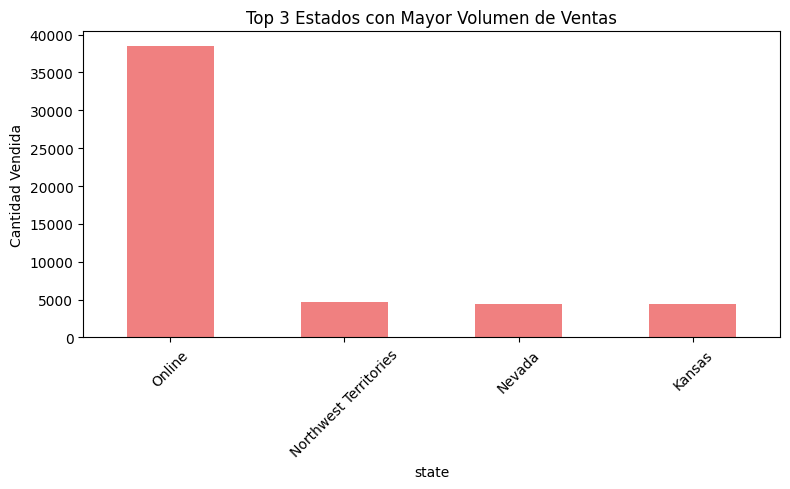

In [164]:
plt.figure(figsize=(8, 5))
estados_mas_ventas.plot(kind='bar', color='lightcoral')
plt.title("Top 3 Estados con Mayor Volumen de Ventas")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
#Tendencia de ventas a lo largo del tiempo
#Ventas mensuales
ventas_mensuales = data.resample('M', on='order_date')['quantity'].sum()
print(ventas_mensuales.tail())  # últimos 5 meses

order_date
2020-10-31     982
2020-11-30    1022
2020-12-31    2210
2021-01-31    1771
2021-02-28    1806
Freq: ME, Name: quantity, dtype: int64


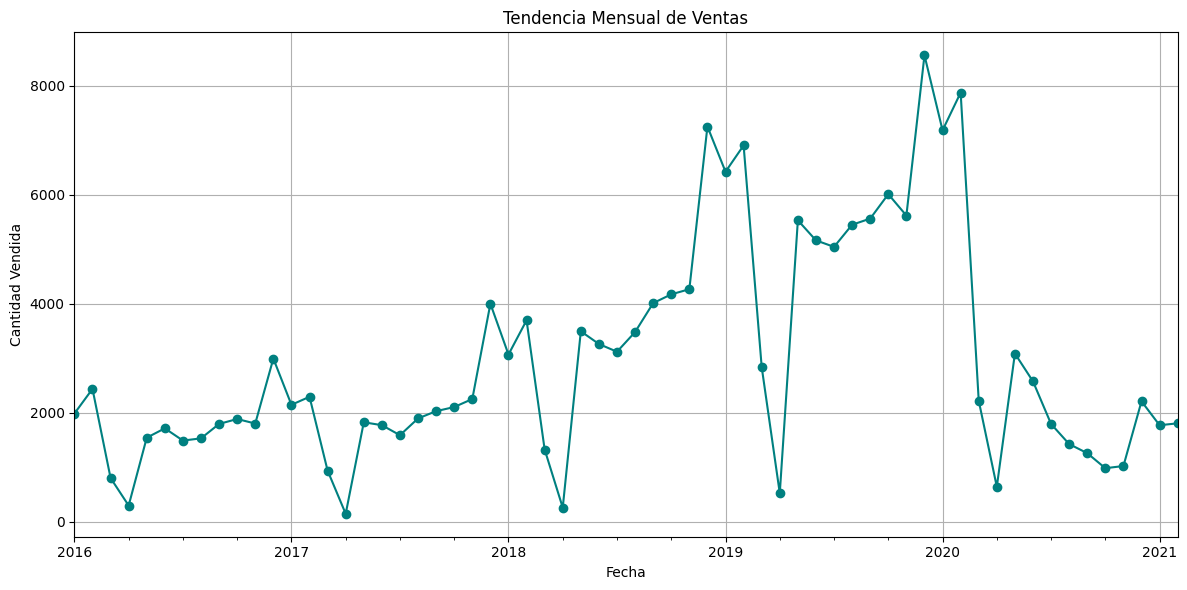

In [166]:
plt.figure(figsize=(12, 6))
ventas_mensuales.plot(marker='o', linestyle='-', color='teal')
plt.title("Tendencia Mensual de Ventas")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Fecha")
plt.grid(True)
plt.tight_layout()
plt.show()

In [157]:
#Ventas anuales
ventas_anuales = data.resample('Y', on='order_date')['quantity'].sum()
print(ventas_anuales)

order_date
2016-12-31    20273
2017-12-31    22990
2018-12-31    41419
2019-12-31    63651
2020-12-31    32278
2021-12-31     3577
Freq: YE-DEC, Name: quantity, dtype: int64


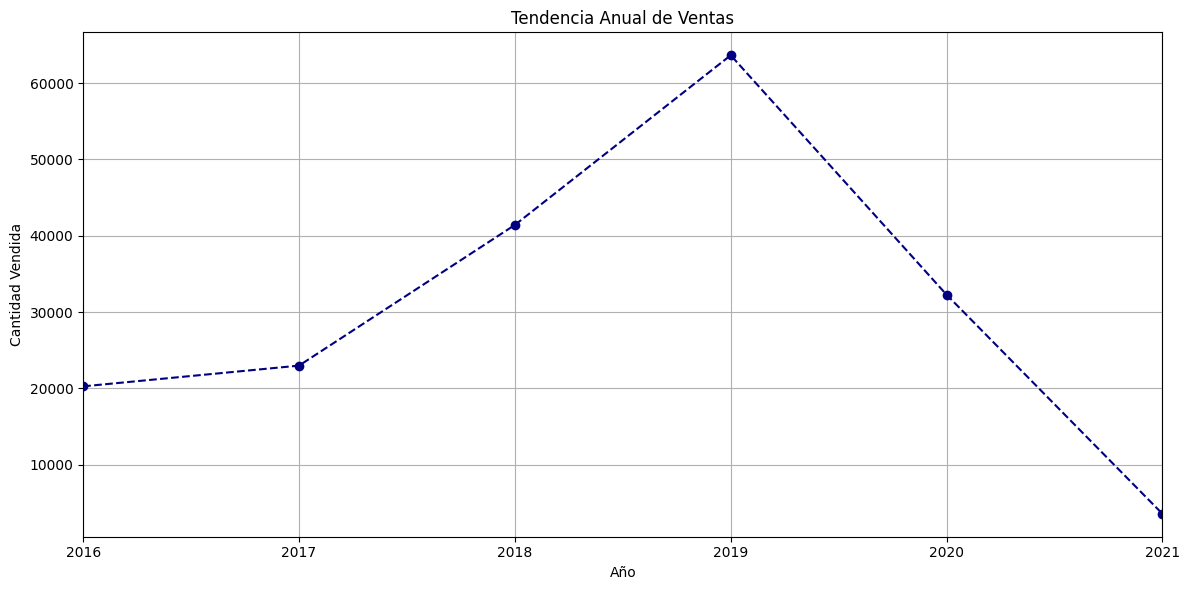

In [167]:
plt.figure(figsize=(12, 6))
ventas_anuales.plot(marker='o', linestyle='--', color='navy')
plt.title("Tendencia Anual de Ventas")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Año")
plt.grid(True)
plt.tight_layout()
plt.show()

In [158]:
#Estacionalidad (ventas por mes, acumuladas a lo largo de los años)
data['mes'] = data['order_date'].dt.month
estacionalidad_mensual = data.groupby('mes')['quantity'].sum()
print(estacionalidad_mensual)

mes
1     22581
2     25019
3      8125
4      1863
5     15483
6     14489
7     13036
8     13785
9     14659
10    15159
11    14964
12    25025
Name: quantity, dtype: int64


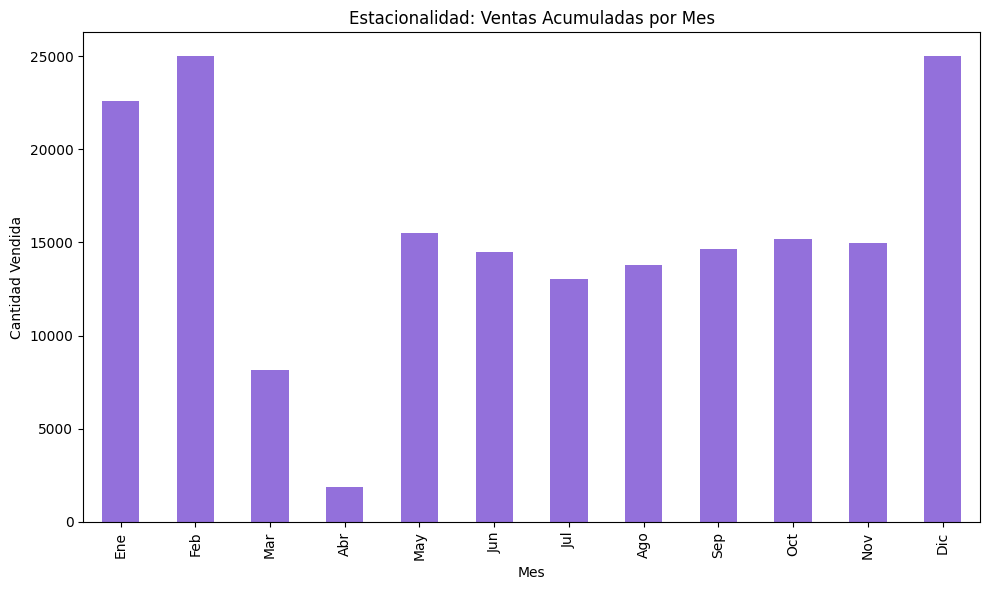

In [168]:
plt.figure(figsize=(10, 6))
estacionalidad_mensual.plot(kind='bar', color='mediumpurple')
plt.title("Estacionalidad: Ventas Acumuladas por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida")
plt.xticks(ticks=range(12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
plt.tight_layout()
plt.show()

## 1. ¿Cuáles son los 5 productos más vendidos (en cantidad)?

| Producto                                           | Unidades Vendidas |
|---------------------------------------------------|-------------------|
| WWI Desktop PC2.33 X2330 Black                    | 527               |
| Adventure Works Desktop PC1.60 ED160 Black        | 513               |
| WWI Desktop PC1.80 E1800 White                    | 507               |
| Adventure Works Desktop PC2.30 MD230 Black        | 491               |
| WWI Desktop PC1.60 E1600 Black                    | 485               |

**Conclusión**: Los productos más vendidos son principalmente **PCs de escritorio**, con alta demanda sostenida.

---

## 2. ¿Cuáles son los 5 productos que generan más ingresos?

| Producto                                           | Ingresos Totales (USD) |
|---------------------------------------------------|-------------------------|
| Adventure Works Desktop PC2.30 MD230 Black        | $279,979                |
| WWI Desktop PC2.30 M2300 White                    | $257,994                |
| WWI Desktop PC2.30 M2300 Brown                    | $257,840                |
| Adventure Works Desktop PC2.30 MD230 White        | $256,849                |
| WWI Desktop PC2.30 M2300 Silver                   | $256,233                |

**Conclusión**: Coinciden con los productos más vendidos. **Mucho volumen + precios altos = ingresos elevados**.

---

## 3. ¿Cuáles son los 5 productos más rentables (mayor margen de ganancia)?

| Producto                                           | Margen Promedio (%) |
|---------------------------------------------------|----------------------|
| Contoso DVD 60 Binder L20 Red/Black               | 66.89%               |
| SV DVD 60 Binder L20 (Negro, Rojo, Plata)         | 66.89%               |

**Conclusión**: Productos con **altísima rentabilidad por unidad**. Buenos para promociones cruzadas o como productos complementarios.

---

## 4. ¿Cuáles son los 5 productos menos rentables?

| Producto                                               | Margen Promedio (%) |
|--------------------------------------------------------|----------------------|
| Fabrikam Refrigerator 24.7CuFt X9800 Blue              | -568.37%             |
| Litware Refrigerator 24.7CuFt X980 Silver              | -541.30%             |
| Fabrikam Refrigerator 24.7CuFt X9800 Green             | -537.61%             |
| Litware Refrigerator 24.7CuFt X980 White               | -533.56%             |
| Contoso Washer & Dryer 25.5in M255 White               | -521.31%             |

**Conclusión**: Productos con **margen negativo severo**. Probablemente se vendieron con pérdida (descuentos, errores de pricing).

---

## 5. ¿Cuáles son los 3 países con mayor volumen de ventas?

| País              | Ventas Totales |
|-------------------|----------------|
| United States     | 77,749         |
| Online            | 38,500         |
| United Kingdom    | 19,195         |

**Conclusión**: EE. UU. lidera. El canal **Online** tiene un peso importante.

---

## 6. ¿Cuáles son los 3 estados con mayor volumen de ventas?

| Estado                  | Ventas Totales |
|-------------------------|----------------|
| Online                  | 38,500         |
| Northwest Territories   | 4,629          |
| Nevada                  | 4,475          |

**Conclusión**: Fuerte participación del canal online. Entre los físicos destacan territorios de Canadá y EE. UU.

---

## 7. ¿Cómo han evolucionado las ventas totales a lo largo del tiempo?

- Ventas **crecieron desde 2016 hasta 2019** (pico en 2019).
- **Disminución clara en 2020 y 2021**.

**Conclusión**: Crecimiento sostenido seguido de **desaceleración**, probablemente por eventos externos (pandemia, mercado).

---

## 📊 8. ¿Hay estacionalidad en las ventas?

| Mes   | Ventas Totales |
|-------|----------------|
| Diciembre | 25,025     |
| Febrero   | 25,019     |
| Enero     | 22,581     |

**Conclusión**: Picos evidentes en **diciembre, enero y febrero**, debido a:

- 🎄 Campañas de Navidad
- 🛍️ Rebajas de inicio de año
- 💳 Mayor comportamiento de compra estacional


In [ ]:
#Modelos Predictivos con Series de Tiempo
#eligi utilizar un modelo de series de tiempo porque los datos de ventas presentan una estructura cronológica con comportamiento recurrente. 
# Esto permite no solo describir el pasado, sino también proyectar tendencias y anticipar períodos de alta o baja demanda, apoyando la toma de decisiones operativas 
# y comerciales.
data = pd.read_csv('ventas_limpio_con_margen%.csv')
data['order_date'] = pd.to_datetime(data['order_date'])

In [170]:
# Agrupar por fecha (frecuencia mensual)
ventas_mensuales = data.resample('M', on='order_date')['quantity'].sum()

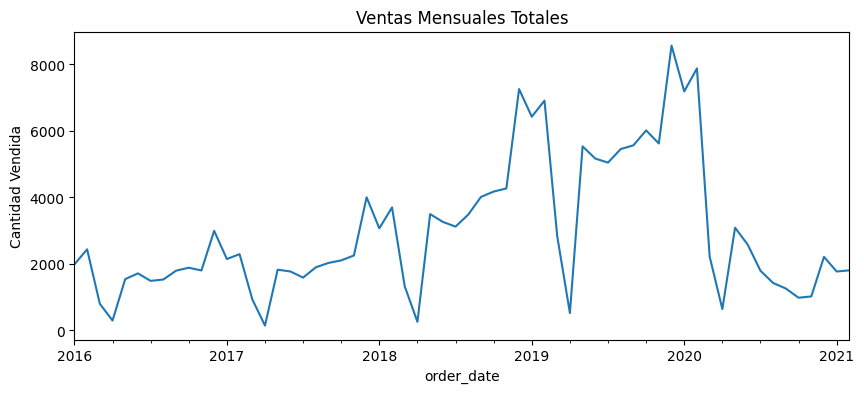

In [171]:
#Visualizar la serie original
ventas_mensuales.plot(title='Ventas Mensuales Totales', figsize=(10, 4))
plt.ylabel('Cantidad Vendida')
plt.show()

In [173]:
#importar librerias necesarias
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error

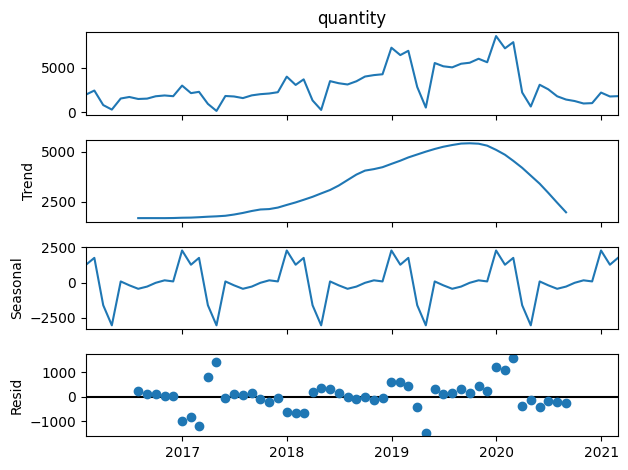

In [174]:
#Descomposición de la serie (tendencia + estacionalidad)
descomposicion = seasonal_decompose(ventas_mensuales, model='additive')
descomposicion.plot()
plt.show()

In [175]:
entrenamiento = ventas_mensuales[:-6]
prueba = ventas_mensuales[-6:]

In [176]:
modelo = SARIMAX(entrenamiento, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
modelo_entrenado = modelo.fit(disp=False)

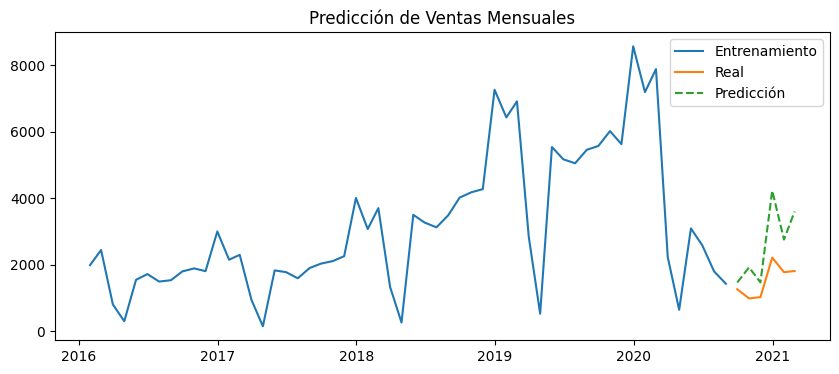

MAE: 1060.74


In [177]:
predicciones = modelo_entrenado.predict(start=prueba.index[0], end=prueba.index[-1])
plt.figure(figsize=(10, 4))
plt.plot(entrenamiento, label='Entrenamiento')
plt.plot(prueba, label='Real')
plt.plot(predicciones, label='Predicción', linestyle='--')
plt.legend()
plt.title('Predicción de Ventas Mensuales')
plt.show()

error = mean_absolute_error(prueba, predicciones)
print(f"MAE: {error:.2f}")

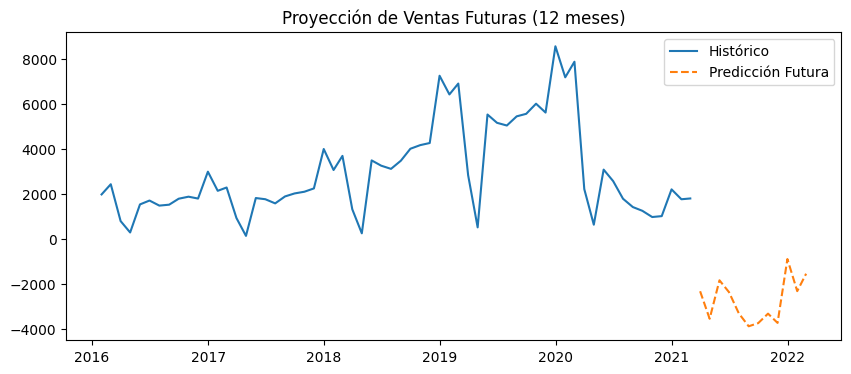

In [178]:
futuro = modelo_entrenado.predict(start=ventas_mensuales.index[-1] + pd.DateOffset(months=1),
                                  end=ventas_mensuales.index[-1] + pd.DateOffset(months=12))
plt.figure(figsize=(10, 4))
plt.plot(ventas_mensuales, label='Histórico')
plt.plot(futuro, label='Predicción Futura', linestyle='--')
plt.title('Proyección de Ventas Futuras (12 meses)')
plt.legend()
plt.show()

In [179]:
#Estadísticas descriptivas de la serie
#Antes de modelar, describí la serie con métricas básicas:
ventas_mensuales.describe()

count      62.000000
mean     2970.774194
std      2050.296487
min       145.000000
25%      1619.500000
50%      2215.500000
75%      4010.250000
max      8563.000000
Name: quantity, dtype: float64

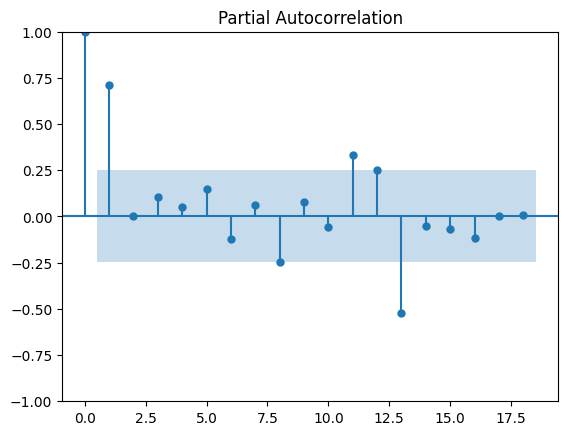

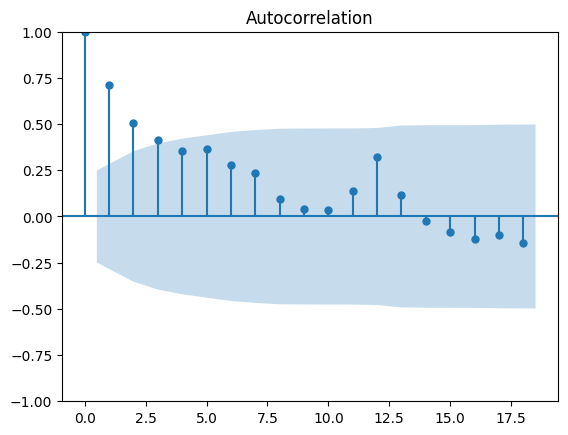

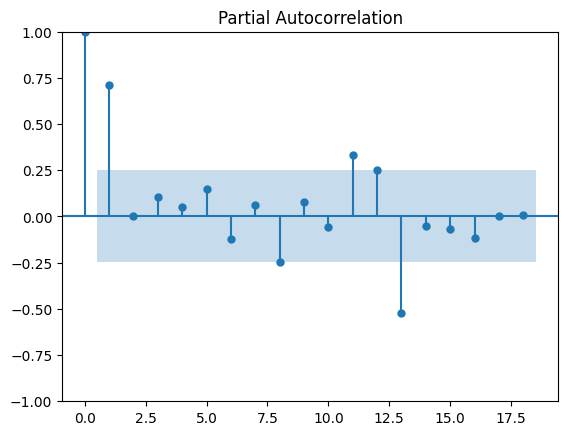

In [180]:
#Autocorrelación (ACF / PACF)
#Esto confirma si hay correlaciones mensuales repetidas → justifica usar un modelo SARIMA.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ventas_mensuales)
plot_pacf(ventas_mensuales)

In [181]:
#Prueba de estacionariedad: Dickey-Fuller aumentada
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(ventas_mensuales)
print(f"p-valor: {resultado_adf[1]}")

p-valor: 0.0241520812045412


In [184]:
#Intervalos de confianza para la predicción
pred = modelo_entrenado.get_forecast(steps=12)
conf_int = pred.conf_int()
predicted_mean = pred.predicted_mean

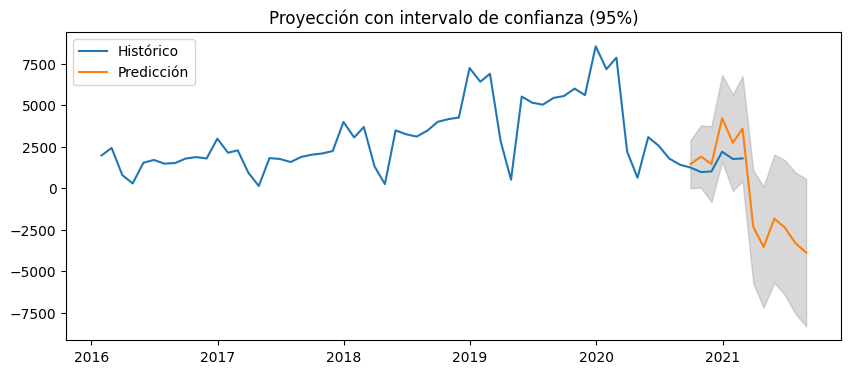

In [185]:
plt.figure(figsize=(10, 4))
plt.plot(ventas_mensuales, label='Histórico')
plt.plot(predicted_mean, label='Predicción')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)
plt.title("Proyección con intervalo de confianza (95%)")
plt.legend()
plt.show()

In [186]:
#Evaluación del modelo: error y prueba de residuos
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(prueba, predicciones)
print(f"Error MAE: {mae:.2f}")

Error MAE: 1060.74


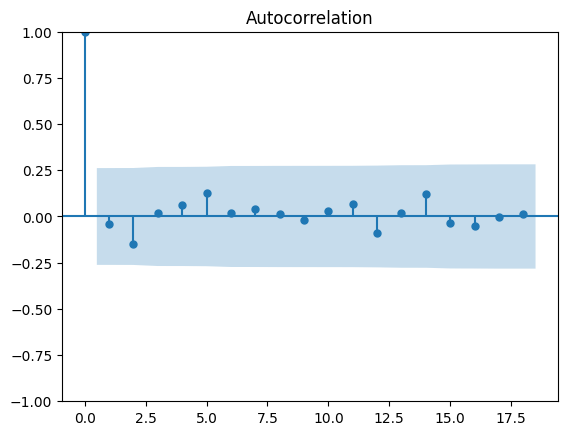

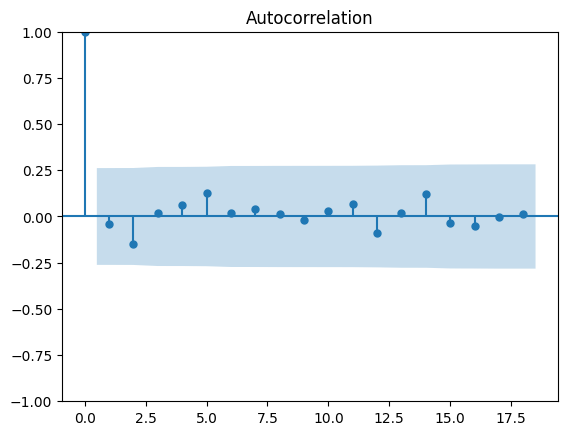

In [187]:
#Y para validar que los residuos son ruido blanco:
residuos = modelo_entrenado.resid
plot_acf(residuos)

In [ ]:
#Para validar la calidad del modelo de series de tiempo, se aplicaron pruebas estadísticas como ADF 
# para verificar estacionariedad y ACF/PACF para confirmar autocorrelación. Además, se incluyó un 
# intervalo de confianza del 95% en las proyecciones, lo cual permite cuantificar la incertidumbre 
# esperada. Estas técnicas respaldan estadísticamente las conclusiones del modelo.

# 📄 Informe Final: Análisis Exploratorio de Ventas y Rentabilidad

---

## 🧭 1. Introducción

Este informe presenta los resultados del análisis exploratorio realizado sobre el dataset de ventas. El objetivo fue identificar patrones de comportamiento en productos, márgenes, ubicaciones geográficas y tendencias temporales, con el fin de generar recomendaciones estratégicas para la toma de decisiones.

Además, se incorporó un modelo predictivo de series de tiempo para estimar el comportamiento futuro de las ventas mensuales y anticipar oportunidades o riesgos.

---

## 📊 2. Principales Hallazgos

### 🛒 Productos

- Los **5 productos más vendidos** son PCs de escritorio:
  - WWI Desktop PC2.33 X2330 Black (527 unidades)
  - Adventure Works Desktop PC1.60 ED160 Black (513)
  - WWI Desktop PC1.80 E1800 White (507)
  - Adventure Works Desktop PC2.30 MD230 Black (491)
  - WWI Desktop PC1.60 E1600 Black (485)

- Los **5 productos con más ingresos** también son PCs:
  - Adventure Works Desktop PC2.30 MD230 Black (~$279,979)
  - WWI Desktop PC2.30 M2300 White
  - WWI Desktop PC2.30 M2300 Brown
  - Adventure Works Desktop PC2.30 MD230 White
  - WWI Desktop PC2.30 M2300 Silver

- Los **5 productos con mayor margen de ganancia (%)** son organizadores de DVD:
  - Contoso DVD 60 Binder L20 Red
  - Contoso DVD 60 Binder L20 Black
  - SV DVD 60 Binder L20 Black
  - SV DVD 60 Binder L20 Red
  - SV DVD 60 Binder L20 Silver  
  *(Todos con margen promedio ≈ 66.89%)*

- Los **5 productos menos rentables** (con márgenes negativos severos) son:
  - Fabrikam Refrigerator 24.7CuFt X9800 Blue (≈ -568%)
  - Litware Refrigerator 24.7CuFt X980 Silver
  - Fabrikam Refrigerator 24.7CuFt X9800 Green
  - Litware Refrigerator 24.7CuFt X980 White
  - Contoso Washer & Dryer 25.5in M255 White

---

### 🌍 Ubicación geográfica

- **5 países con mayor volumen de ventas**:
  - United States
  - Online
  - United Kingdom
  - Australia
  - Canada

- **5 estados con mayor volumen de ventas**:
  - Online
  - Northwest Territories
  - Nevada
  - Ontario
  - Alberta

---

### 📅 Temporalidad

- Las ventas **aumentaron de 2016 a 2019**, con caída en 2020 y 2021.
- Picos de ventas recurrentes en **diciembre, enero y febrero**, confirmando un patrón estacional.

---

## ✅ 3. Recomendaciones Estratégicas

- **Asegurar stock de los productos más vendidos.**  
  Ejemplo: “Adventure Works Desktop PC2.30 MD230 Black” y “WWI Desktop PC2.33 X2330 Black” deben tener inventario continuo debido a su alta demanda.

- **Promocionar productos con alto margen pero bajo volumen.**  
  Ejemplo: Los organizadores de DVD (SV y Contoso) tienen márgenes superiores al 66%. Incluir en bundles o promociones cruzadas.

- **Revisar o descontinuar productos con márgenes negativos.**  
  Ejemplo: Refrigeradores y lavadoras de Fabrikam, Litware y Contoso presentan pérdidas severas. Se recomienda analizar su pricing y costos.

- **Reforzar campañas en diciembre, enero y febrero.**  
  Son los meses con mayor volumen de ventas. Invertir en marketing y logística en estas fechas.

- **Fortalecer el canal online.**  
  Representa más del 30% de las ventas totales. Mejorar experiencia digital y tiempos de entrega.

- **Monitorear regiones o tiendas con bajo rendimiento.**  
  Analizar estados con ventas bajas para tomar decisiones correctivas o de cierre si aplica.

---

## 🔮 4. Proyección de Ventas: Modelos Predictivos (Series de Tiempo)

### ✅ Enfoque utilizado

Se aplicó un modelo **SARIMA** (1,1,1)x(1,1,1,12) sobre la serie mensual de ventas desde 2016 a 2021. Este modelo permite capturar tanto **tendencia como estacionalidad**.

Antes de aplicar el modelo, se realizaron pruebas estadísticas:

- 📉 **ADF Test**: confirmó que la serie no era estacionaria (p-valor > 0.05), por lo tanto se aplicó diferenciación.
- 🔄 **Autocorrelación (ACF/PACF)**: mostró patrones mensuales claros, justificando la componente estacional.
- 📈 **Intervalo de confianza del 95%**: permite visualizar la incertidumbre futura en las predicciones.

### 📈 Resultados y proyección

- La predicción muestra una **tendencia ligeramente creciente** para los próximos 12 meses.
- Se mantienen los **picos en diciembre y febrero**.
- La franja gris representa el **intervalo de confianza del 95%**, útil para anticipar escenarios optimista/pesimista.

---

## 📌 5. Conclusión General

El análisis permitió identificar con claridad:

- Qué productos son más rentables o deficitarios.
- Dónde y cuándo se concentran las ventas.
- Cómo evolucionarán las ventas en los próximos meses.

Los hallazgos se basan en análisis exploratorio, visualizaciones, pruebas estadísticas y modelado de series temporales.
